<a href="https://colab.research.google.com/github/Anjum-Ul-Muqset/Thesis/blob/main/testing_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-learn keras

In [ ]:
!pip install tensorflow

In [ ]:
!pip install tabulate

In [ ]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import StratifiedKFold
from sklearn.random_projection import SparseRandomProjection
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.neural_network import BernoulliRBM
from keras.layers import Input, Dense, GaussianNoise
from keras import regularizers
from keras.models import Model
from keras.models import Sequential
from keras.optimizers import Adam
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import precision_recall_fscore_support
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import KernelPCA
from sklearn.feature_selection import SelectKBest, f_classif

In [ ]:
bc_tcga_normal = pd.read_csv('BC-TCGA-Normal.csv')
bc_tcga_tumor = pd.read_csv('BC-TCGA-Tumor.csv')

gse2034_normal = pd.read_csv('GSE2034-Normal.csv')
gse2034_tumor = pd.read_csv('GSE2034-Tumor.csv')

gse25066_normal = pd.read_csv('GSE25066-Normal.csv')
gse25066_tumor = pd.read_csv('GSE25066-Tumor.csv')

#simulation_data_normal = pd.read_csv('Simulation-Data-Normal.csv')
#simulation_data_tumor = pd.read_csv('Simulation-Data-Tumor.csv')

# Adding a new row with 'tumor' information
bc_tcga_normal.loc[len(bc_tcga_normal)] = ['tumor'] + ['no'] * (len(bc_tcga_normal.columns) - 1)
bc_tcga_tumor.loc[len(bc_tcga_tumor)] = ['tumor'] + ['yes'] * (len(bc_tcga_tumor.columns) - 1)

gse2034_normal.loc[len(gse2034_normal)] = ['tumor'] + ['no'] * (len(gse2034_normal.columns) - 1)
gse2034_tumor.loc[len(gse2034_tumor)] = ['tumor'] + ['yes'] * (len(gse2034_tumor.columns) - 1)

gse25066_normal.loc[len(gse25066_normal)] = ['tumor'] + ['no'] * (len(gse25066_normal.columns) - 1)
gse25066_tumor.loc[len(gse25066_tumor)] = ['tumor'] + ['yes'] * (len(gse25066_tumor.columns) - 1)

#simulation_data_normal.loc[len(simulation_data_normal)] = ['tumor'] + ['no'] * (len(simulation_data_normal.columns) - 1)
#simulation_data_tumor.loc[len(simulation_data_tumor)] = ['tumor'] + ['yes'] * (len(simulation_data_tumor.columns) - 1)

# Merging the datasets
bc_tcga = pd.merge(bc_tcga_normal, bc_tcga_tumor, on='Hybridization REF')
gse2034 = pd.merge(gse2034_normal, gse2034_tumor, on='Hybridization REF')
gse25066 = pd.merge(gse25066_normal, gse25066_tumor, on='Hybridization REF')
#simulation_data = pd.merge(simulation_data_normal, simulation_data_tumor, on='Hybridization REF')


bc_tcga.to_csv('Merged_BC-TCGA.csv', index=False)
gse2034.to_csv('Merged_GSE2034.csv', index=False)
gse25066.to_csv('Merged_GSE25066.csv', index=False)
#simulation_data.to_csv('Merged_SimulationData.csv', index=False)

In [ ]:
bc_tcga_transposed = bc_tcga.transpose()
gse2034_transposed = gse2034.transpose()
gse25066_transposed = gse25066.transpose()
#simulation_data_transposed = simulation_data.transpose()


bc_tcga_transposed.to_csv('Transposed_BC-TCGA.csv', index=True, header=False)
gse2034_transposed.to_csv('Transposed_GSE2034.csv', index=True, header=False)
gse25066_transposed.to_csv('Transposed_GSE25066.csv', index=True, header=False)
#simulation_data_transposed.to_csv('Transposed_SimulationData.csv', index=True, header=False)

In [ ]:
bc_tcga_transposed = pd.read_csv('Transposed_BC-TCGA.csv')
gse2034_transposed = pd.read_csv('Transposed_GSE2034.csv')
gse25066_transposed = pd.read_csv('Transposed_GSE25066.csv')
#simulation_data_transposed = pd.read_csv('Transposed_SimulationData.csv')

In [ ]:
bc_tcga_shuffled = bc_tcga_transposed.sample(frac=1, random_state=42).reset_index(drop=True)
gse2034_shuffled = gse2034_transposed.sample(frac=1, random_state=42).reset_index(drop=True)
gse25066_shuffled = gse25066_transposed.sample(frac=1, random_state=42).reset_index(drop=True)
#simulation_data_shuffled = simulation_data_transposed.sample(frac=1, random_state=42).reset_index(drop=True)

bc_tcga_shuffled.to_csv('main_BC-TCGA.csv', index=False)
gse2034_shuffled.to_csv('main_GSE2034.csv', index=False)
gse25066_shuffled.to_csv('main_GSE25066.csv', index=False)
#simulation_data_shuffled.to_csv('main_SimulationData.csv', index=False)

In [ ]:
bc_tcga = pd.read_csv('main_BC-TCGA.csv')
gse2034 = pd.read_csv('main_GSE2034.csv')
gse25066 = pd.read_csv('main_GSE25066.csv')
#simulation_data = pd.read_csv('main_SimulationData.csv')

In [ ]:
bc_tcga

,Hybridization REF,ELMO2,CREB3L1,RPS11,PNMA1,MMP2,C10orf90,ZHX3,ERCC5,GPR98,...,GRIP2,GPLD1,RAB8A,RXFP2,PIK3IP1,SLC39A6,SNRPD2,AQP7,CTSC,tumor
0,TCGA-BH-A18G-01A-11R-A12D-07,-0.044667,1.58625,1.173625,-1.03550,0.916833,1.41375,0.212833,0.58575,-1.684250,...,-0.10875,-1.224667,-0.0885,0.5070,0.85350,-1.3730,0.3962,-0.4240,0.0243,yes
1,TCGA-BH-A0W4-01A-11R-A109-07,-0.137917,1.36775,0.895125,0.62125,1.187167,-2.05125,0.024500,0.17525,0.820625,...,-0.52725,-0.833167,-0.1785,0.4005,2.06000,1.6608,-0.0323,1.2510,-0.7398,yes
2,TCGA-BH-A18V-01A-11R-A12D-07,0.023583,0.14875,-0.289250,-0.11675,-0.018000,-2.03175,-1.488167,0.52325,-1.977500,...,-0.22275,-0.835167,0.8030,0.2495,0.77775,-1.9864,0.7179,-0.6990,1.2695,yes
3,TCGA-B6-A0RL-01A-11R-A084-07,1.239083,0.62400,-0.081000,0.37275,-2.251000,-1.79325,0.519333,-0.55300,-2.509625,...,-0.67350,-0.320000,-0.1229,0.3765,0.75275,0.7103,0.2939,-0.5540,-2.1516,yes
4,TCGA-AN-A0G0-01A-11R-A034-07,-0.555000,0.21750,0.427375,-1.02450,-0.078167,0.58150,-0.814833,-1.13675,-1.725875,...,-0.24900,-0.888667,-0.1474,-1.2875,1.54650,-0.7280,0.0917,-0.7830,2.3209,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
585,TCGA-A8-A06R-01A-11R-A00Z-07,0.272750,1.50300,0.029625,0.03150,1.303833,-2.57325,-0.148333,-0.55825,0.079250,...,0.00150,-0.365333,1.1907,1.1155,1.44925,1.4244,-0.5550,-0.9630,-0.2038,yes
586,TCGA-AN-A049-01A-21R-A00Z-07,0.007333,0.87425,0.131750,0.36100,0.610000,-1.65375,-0.400500,0.30425,0.011125,...,-0.14975,-0.884833,0.3503,1.5300,1.74325,3.3503,0.4685,0.1615,-0.1895,yes
587,TCGA-A2-A0YM-01A-11R-A109-07,-0.417000,-0.15175,-0.047125,0.26750,-0.101333,-0.69625,-1.234167,-0.17725,-1.714875,...,0.00975,-1.400667,0.0426,-0.2475,0.62350,-2.5507,-0.3946,-0.2035,0.3814,yes
588,TCGA-A2-A0CV-01A-31R-A115-07,0.023250,1.07750,0.771125,-0.23325,1.112833,-1.60500,-0.326333,0.02700,-0.354625,...,-0.08200,-1.373167,-0.0637,-0.4740,2.25300,1.9935,0.0378,-0.9835,-0.7580,yes


In [ ]:
gse2034

,Hybridization REF,2,9,10,12,13,14,15,16,18,...,100133941,100134017,100134018,100134128,100134401,100134498,100134713,100169750,100170939,tumor
0,GSM36815,4.868683,4.729869,-2.022420,6.073213,-1.065191,2.058995,-5.272892,2.511478,1.321999,...,4.921560,-1.569691,-3.540293,-5.246302,2.705088,-2.510515,-1.407916,-0.054751,1.658312,no
1,GSM37024,3.981340,2.787439,-2.418753,5.240463,-3.178167,2.018753,-4.528692,3.231576,2.301046,...,5.081178,-3.735345,-1.821119,-3.459267,2.383726,-1.374577,-1.201524,0.863212,0.188210,yes
2,GSM36824,4.748440,1.071601,-2.979184,5.673549,-2.668939,1.046512,-3.884347,3.259259,-1.669354,...,4.724423,-2.418554,-1.066980,-3.771844,2.026606,-2.947709,-4.204854,0.043207,-0.780214,yes
3,GSM36916,5.213649,6.531368,-1.484088,5.528525,-0.119553,1.211062,-2.650224,2.498515,0.985961,...,3.648102,-1.735251,-0.174616,-5.028710,3.162811,-3.728794,-3.105153,0.213745,1.228159,yes
4,GSM36942,4.103230,5.309710,-2.393801,4.452419,-3.168495,0.831710,-5.203941,2.431216,-0.574499,...,4.970739,-3.747161,0.014701,-5.005308,1.211232,-2.934557,-1.854859,0.577654,0.805089,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,GSM36883,4.514666,3.147038,-1.932707,2.084645,-3.999147,1.697006,-3.684319,3.293516,-0.095889,...,5.193184,-1.522967,-0.629391,-3.583914,3.918988,-2.129693,-2.416220,1.170936,1.510979,yes
282,GSM36998,4.176522,3.991476,-2.896704,4.653334,-3.429073,1.818125,-4.672366,2.511690,0.181838,...,4.593841,-3.373162,-1.396359,-5.189068,2.812273,-3.690836,-1.227528,0.017149,0.559852,no
283,GSM37058,4.834182,3.472645,-3.479302,4.730419,-0.736423,2.060263,-6.005868,2.758732,0.236332,...,3.913511,-1.958400,-1.074511,-4.571619,1.070229,-0.696639,-0.992212,-0.312738,0.111942,no
284,GSM37033,4.884936,4.725590,-2.289928,5.777950,-1.379017,2.145794,-4.683953,3.123524,1.183775,...,5.020933,-3.923639,-0.500755,-4.661862,2.749618,-0.776941,-1.368773,1.192860,-0.748358,yes


In [ ]:
gse25066

,Hybridization REF,2,9,10,12,13,14,15,16,18,...,100133941,100134017,100134018,100134128,100134401,100134498,100134713,100169750,100170939,tumor
0,patient-375,10.073348,8.508736,5.878465,12.424395,5.349684,10.949983,6.747154,11.890096,4.114624,...,13.527530,3.216416,8.947426,8.052683,8.450992,4.521209,5.824795,10.034103,8.275106,no
1,patient-299,13.066024,8.190192,4.848983,13.865238,6.902157,10.523864,4.468176,11.413596,6.169364,...,13.566692,4.332046,7.947097,7.679645,8.467705,5.167429,7.607104,8.042208,7.716433,no
2,patient-211,12.553012,13.122928,7.929091,12.630402,5.547974,9.652257,3.215322,10.730265,8.646371,...,12.547969,5.089402,7.580988,6.720163,11.498598,4.944025,6.877119,11.142393,9.575057,yes
3,patient-227,10.987345,8.675896,7.000146,13.022349,5.127136,9.544557,4.751135,11.879960,7.500914,...,12.043858,3.853835,6.681887,8.326937,7.977532,4.767909,6.847307,9.483148,7.757869,yes
4,patient-319,10.625696,8.420795,6.437226,10.120195,5.435246,10.095071,3.650671,10.838635,6.729194,...,13.501062,7.260081,8.380577,8.373385,9.036594,4.649962,7.749561,7.939991,7.215405,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487,patient-8,12.869975,12.027260,6.851911,14.864565,5.988840,10.161955,3.458219,11.278683,8.836395,...,12.455552,6.313323,6.681887,9.319388,12.159520,5.065283,6.933924,10.122212,11.916959,yes
488,patient-209,8.698689,14.258542,6.611891,15.240524,5.236846,9.971793,3.903771,11.255052,8.042915,...,11.728910,2.371615,5.873002,8.644851,9.388968,5.299665,7.042471,10.145292,7.964932,yes
489,patient-307,9.056092,13.350490,5.308508,12.828324,4.771257,9.864336,4.176324,10.774929,10.522097,...,14.319825,5.405652,8.059927,6.470535,10.176548,5.436415,5.282031,8.523463,9.814512,yes
490,patient-423,9.827644,9.630964,7.328680,15.060735,7.904826,11.221701,3.678551,12.141157,9.621856,...,13.372950,3.092043,8.407576,11.605410,10.512789,7.513558,7.840592,11.411264,8.442295,yes


# **BCTCGA**

# **DATA PREPROCESS**

## **Replacing NAN values & Precessing by Z scores**

In [ ]:
# Drop unnecessary columns
bc_tcga_data = bc_tcga.drop(columns=['Hybridization REF', 'tumor'])

# Separate the data into tumor and non-tumor groups
tumor_data = bc_tcga_data[bc_tcga['tumor'] == 'yes']
normal_data = bc_tcga_data[bc_tcga['tumor'] == 'no']

# Calculate mean values for each group
tumor_mean = tumor_data.mean()
normal_mean = normal_data.mean()

# Fill missing values with mean values
bc_tcga_data_tumor_filled = tumor_data.fillna(tumor_mean)
bc_tcga_data_normal_filled = normal_data.fillna(normal_mean)

# Concatenate the filled data back together
bc_tcga_data_filled = pd.concat([bc_tcga_data_tumor_filled, bc_tcga_data_normal_filled])

# Get the 'Hybridization REF' column
hybridization_ref = bc_tcga['Hybridization REF']

# Add 'Hybridization REF' and 'tumor' columns back
bc_tcga_data_filled = pd.concat([hybridization_ref, bc_tcga_data_filled, bc_tcga['tumor']], axis=1)

# Save the preprocessed data
bc_tcga_data_filled.to_csv('Preprocessed_BC-TCGA_Filled.csv', index=False)

# Apply Z-score normalization
data_values = bc_tcga_data_filled.iloc[:, 1:-1].values
scaler = StandardScaler()
normalized_data = scaler.fit_transform(data_values)

# Create a DataFrame with the normalized values
bc_tcga_normalized = pd.DataFrame(data=normalized_data, columns=bc_tcga_data_filled.columns[1:-1])

# Add 'Hybridization REF' and 'tumor' columns back
bc_tcga_normalized = pd.concat([hybridization_ref, bc_tcga_normalized, bc_tcga['tumor']], axis=1)

# Save the preprocessed data
bc_tcga_normalized.to_csv('Preprocessed_BC-TCGA_Normalized.csv', index=False)



In [ ]:
bc_tcga_normalized

,Hybridization REF,ELMO2,CREB3L1,RPS11,PNMA1,MMP2,C10orf90,ZHX3,ERCC5,GPR98,...,GRIP2,GPLD1,RAB8A,RXFP2,PIK3IP1,SLC39A6,SNRPD2,AQP7,CTSC,tumor
0,TCGA-BH-A18G-01A-11R-A12D-07,-0.547600,0.906749,1.403060,-1.773362,0.556704,2.725784,0.870378,1.028592,-1.137918,...,0.396418,-0.795587,-0.606984,0.238249,-1.791841,-1.096140,0.820977,-0.366910,0.279191,yes
1,TCGA-BH-A0W4-01A-11R-A109-07,-0.715430,0.643555,0.861072,0.924985,0.836514,-0.483018,0.471868,0.197657,1.087801,...,-0.833246,-0.343399,-0.773477,0.082911,-0.030930,0.593229,-0.145045,0.752569,-0.622907,yes
2,TCGA-BH-A18V-01A-11R-A12D-07,-0.424765,-0.824785,-1.443837,-0.276995,-0.410898,-0.464960,-2.728912,0.902079,-1.398486,...,0.061456,-0.345709,1.042230,-0.137332,-1.902400,-1.437711,1.546226,-0.550705,1.749275,yes
3,TCGA-B6-A0RL-01A-11R-A084-07,1.762871,-0.252325,-1.038562,0.520254,-2.722173,-0.244094,1.518927,-1.276467,-1.871309,...,-1.262968,0.249316,-0.670621,0.047906,-1.938888,0.063944,0.590349,-0.453795,-2.289679,yes
4,TCGA-AN-A0G0-01A-11R-A034-07,-1.466090,-0.741973,-0.049215,-1.755447,-0.473174,1.955070,-1.304149,-2.458095,-1.174904,...,-0.015674,-0.407502,-0.715945,-2.379146,-0.780394,-0.736972,0.134504,-0.606846,2.990559,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
585,TCGA-A8-A06R-01A-11R-A00Z-07,-2.211950,-0.582070,1.104821,0.130994,-0.477314,1.725175,-0.702504,0.297855,0.295988,...,1.996304,1.545627,-2.231408,1.006183,-1.051500,-0.002377,1.081814,1.576639,-0.310165,yes
586,TCGA-AN-A049-01A-21R-A00Z-07,-1.491437,-0.360132,2.536418,0.329289,-0.876845,0.262462,0.727549,-0.966258,0.420274,...,-0.198581,0.363662,-1.346771,-0.199321,0.175227,-0.651663,-0.441277,1.751077,-0.877798,yes
587,TCGA-A2-A0YM-01A-11R-A109-07,-2.406926,-0.958791,1.525178,-0.114532,0.073507,1.266543,0.062072,0.488636,-0.853612,...,0.980399,0.986215,-2.897383,-0.576360,1.310734,-0.946848,0.023812,2.078567,0.044251,yes
588,TCGA-A2-A0CV-01A-31R-A115-07,-0.985248,-0.616399,0.914103,0.292643,-0.374499,2.481536,-0.023273,0.385402,0.346635,...,0.460325,1.056671,-1.516780,-0.508536,1.166241,-0.075212,-0.628845,1.379143,-0.131777,yes


In [ ]:
print(bc_tcga_normalized.columns)

Index(['Hybridization REF', 'ELMO2', 'CREB3L1', 'RPS11', 'PNMA1', 'MMP2',
       'C10orf90', 'ZHX3', 'ERCC5', 'GPR98',
       ...
       'GRIP2', 'GPLD1', 'RAB8A', 'RXFP2', 'PIK3IP1', 'SLC39A6', 'SNRPD2',
       'AQP7', 'CTSC', 'tumor'],
      dtype='object', length=17816)


# **Without Dimensionality Reduction**

In [ ]:

bc_tcga_normalized = pd.read_csv('Preprocessed_BC-TCGA_Normalized.csv')

# Prepare the data
X = bc_tcga_normalized.iloc[:, 1:-1]
y = bc_tcga_normalized['tumor']

# Set the number of iterations
avg_accuracies_svm = []
avg_precision_svm = []
avg_recall_svm = []
avg_f1_svm = []

avg_accuracies_svm_rbf = []
avg_precision_svm_rbf = []
avg_recall_svm_rbf = []
avg_f1_svm_rbf = []

avg_accuracies_ann = []
avg_precision_ann = []
avg_recall_ann = []
avg_f1_ann = []

for iteration in range(10):
    # Stratified train-test split
    sss = StratifiedShuffleSplit(n_splits=1, test_size=500, random_state=iteration)
    for train_index, test_index in sss.split(X, y):
        X_train = X.iloc[train_index]
        X_test = X.iloc[test_index]
        y_train = y.iloc[train_index]
        y_test = y.iloc[test_index]

    # Apply Min-Max scaling to the features
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train and test SVM
    svm = SVC(kernel='linear', C=1.0, gamma='auto')
    start_time = time.time()
    svm.fit(X_train_scaled, y_train)
    training_time = time.time() - start_time
    predictions_svm = svm.predict(X_test_scaled)
    accuracy_svm = accuracy_score(y_test, predictions_svm)
    precision_svm, recall_svm, f1_svm, _ = precision_recall_fscore_support(y_test, predictions_svm, average='binary', pos_label='yes')

    avg_accuracies_svm.append(accuracy_svm)
    avg_precision_svm.append(precision_svm)
    avg_recall_svm.append(recall_svm)
    avg_f1_svm.append(f1_svm)

    # Train and test SVM-RBF
    svm_rbf = SVC(kernel='rbf', C=1.0, gamma='auto')
    start_time_rbf = time.time()
    svm_rbf.fit(X_train_scaled, y_train)
    training_time_rbf = time.time() - start_time_rbf
    predictions_svm_rbf = svm_rbf.predict(X_test_scaled)
    accuracy_svm_rbf = accuracy_score(y_test, predictions_svm_rbf)
    precision_svm_rbf, recall_svm_rbf, f1_svm_rbf, _ = precision_recall_fscore_support(y_test, predictions_svm_rbf, average='binary', pos_label='yes')

    avg_accuracies_svm_rbf.append(accuracy_svm_rbf)
    avg_precision_svm_rbf.append(precision_svm_rbf)
    avg_recall_svm_rbf.append(recall_svm_rbf)
    avg_f1_svm_rbf.append(f1_svm_rbf)

    # Train and test ANN
    ann = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=iteration)
    start_time_ann = time.time()
    ann.fit(X_train_scaled, y_train)
    training_time_ann = time.time() - start_time_ann
    predictions_ann = ann.predict(X_test_scaled)
    accuracy_ann = accuracy_score(y_test, predictions_ann)
    precision_ann, recall_ann, f1_ann, _ = precision_recall_fscore_support(y_test, predictions_ann, average='binary', pos_label='yes')

    avg_accuracies_ann.append(accuracy_ann)
    avg_precision_ann.append(precision_ann)
    avg_recall_ann.append(recall_ann)
    avg_f1_ann.append(f1_ann)

# Calculate average scores
avg_accuracy_svm = np.mean(avg_accuracies_svm)
avg_precision_svm = np.mean(avg_precision_svm)
avg_recall_svm = np.mean(avg_recall_svm)
avg_f1_svm = np.mean(avg_f1_svm)

avg_accuracy_svm_rbf = np.mean(avg_accuracies_svm_rbf)
avg_precision_svm_rbf = np.mean(avg_precision_svm_rbf)
avg_recall_svm_rbf = np.mean(avg_recall_svm_rbf)
avg_f1_svm_rbf = np.mean(avg_f1_svm_rbf)

avg_accuracy_ann = np.mean(avg_accuracies_ann)
avg_precision_ann = np.mean(avg_precision_ann)
avg_recall_ann = np.mean(avg_recall_ann)
avg_f1_ann = np.mean(avg_f1_ann)

# Print results
print("SVM Results:")
print(f"Average Accuracy: {avg_accuracy_svm}")
print(f"Average Precision: {avg_precision_svm}")
print(f"Average Recall: {avg_recall_svm}")
print(f"Average F1 Score: {avg_f1_svm}")

print("\nSVM-RBF Results:")
print(f"Average Accuracy: {avg_accuracy_svm_rbf}")
print(f"Average Precision: {avg_precision_svm_rbf}")
print(f"Average Recall: {avg_recall_svm_rbf}")
print(f"Average F1 Score: {avg_f1_svm_rbf}")

print("\nANN Results:")
print(f"Average Accuracy: {avg_accuracy_ann}")
print(f"Average Precision: {avg_precision_ann}")
print(f"Average Recall: {avg_recall_ann}")
print(f"Average F1 Score: {avg_f1_ann}")


SVM Results:
Average Accuracy: 0.9932000000000001
Average Precision: 0.995990068361562
Average Recall: 0.9964285714285716
Average F1 Score: 0.9962073412494599

SVM-RBF Results:
Average Accuracy: 0.8960000000000001
Average Precision: 0.8960000000000001
Average Recall: 1.0
Average F1 Score: 0.9451476793248943

ANN Results:
Average Accuracy: 0.9782
Average Precision: 0.9788588820112072
Average Recall: 0.9982142857142856
Average F1 Score: 0.9882037313425845


## **PCA**

In [ ]:
accuracies_svm = []
precisions_svm = []
recalls_svm = []
f1_scores_svm = []

accuracies_svm_rbf = []
precisions_svm_rbf = []
recalls_svm_rbf = []
f1_scores_svm_rbf = []

accuracies_ann = []
precisions_ann = []
recalls_ann = []
f1_scores_ann = []

# Set PCA dimension
dim = 1000

# Define the number of folds
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)  # 5-fold cross-validation

# Define the feature set and labels
X = bc_tcga_normalized.iloc[:, 1:-1]  # Exclude the first column (Hybridization REF) and last (tumor label)
y = bc_tcga_normalized['tumor']

# Perform cross-validation
for train_index, test_index in kf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Apply PCA
    pca = PCA(n_components=min(dim, X_train.shape[0], X_train.shape[1]))
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    # Train and evaluate SVM (linear kernel)
    svm = SVC(kernel='linear', C=1.0, gamma='auto')
    svm.fit(X_train_pca, y_train)
    predictions_svm = svm.predict(X_test_pca)
    accuracy_svm = accuracy_score(y_test, predictions_svm)
    precision_svm, recall_svm, f1_svm, _ = precision_recall_fscore_support(y_test, predictions_svm, average='binary', pos_label='yes')

    accuracies_svm.append(accuracy_svm)
    precisions_svm.append(precision_svm)
    recalls_svm.append(recall_svm)
    f1_scores_svm.append(f1_svm)

    # Train and evaluate SVM (RBF kernel)
    svm_rbf = SVC(kernel='rbf', C=1.0, gamma='auto')
    svm_rbf.fit(X_train_pca, y_train)
    predictions_svm_rbf = svm_rbf.predict(X_test_pca)
    accuracy_svm_rbf = accuracy_score(y_test, predictions_svm_rbf)
    precision_svm_rbf, recall_svm_rbf, f1_svm_rbf, _ = precision_recall_fscore_support(y_test, predictions_svm_rbf, average='binary', pos_label='yes')

    accuracies_svm_rbf.append(accuracy_svm_rbf)
    precisions_svm_rbf.append(precision_svm_rbf)
    recalls_svm_rbf.append(recall_svm_rbf)
    f1_scores_svm_rbf.append(f1_svm_rbf)

    # Train and evaluate ANN
    ann = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
    ann.fit(X_train_pca, y_train)
    predictions_ann = ann.predict(X_test_pca)
    accuracy_ann = accuracy_score(y_test, predictions_ann)
    precision_ann, recall_ann, f1_ann, _ = precision_recall_fscore_support(y_test, predictions_ann, average='binary', pos_label='yes')

    accuracies_ann.append(accuracy_ann)
    precisions_ann.append(precision_ann)
    recalls_ann.append(recall_ann)
    f1_scores_ann.append(f1_ann)

# Calculate average scores across all folds
avg_accuracy_svm = np.mean(accuracies_svm)
avg_precision_svm = np.mean(precisions_svm)
avg_recall_svm = np.mean(recalls_svm)
avg_f1_svm = np.mean(f1_scores_svm)

avg_accuracy_svm_rbf = np.mean(accuracies_svm_rbf)
avg_precision_svm_rbf = np.mean(precisions_svm_rbf)
avg_recall_svm_rbf = np.mean(recalls_svm_rbf)
avg_f1_svm_rbf = np.mean(f1_scores_svm_rbf)

avg_accuracy_ann = np.mean(accuracies_ann)
avg_precision_ann = np.mean(precisions_ann)
avg_recall_ann = np.mean(recalls_ann)
avg_f1_ann = np.mean(f1_scores_ann)

# Print results
print("SVM Results (Linear Kernel):")
print(f"Average Accuracy: {avg_accuracy_svm}")
print(f"Average Precision: {avg_precision_svm}")
print(f"Average Recall: {avg_recall_svm}")
print(f"Average F1 Score: {avg_f1_svm}")

print("\nSVM-RBF Results:")
print(f"Average Accuracy: {avg_accuracy_svm_rbf}")
print(f"Average Precision: {avg_precision_svm_rbf}")
print(f"Average Recall: {avg_recall_svm_rbf}")
print(f"Average F1 Score: {avg_f1_svm_rbf}")

print("\nANN Results:")
print(f"Average Accuracy: {avg_accuracy_ann}")
print(f"Average Precision: {avg_precision_ann}")
print(f"Average Recall: {avg_recall_ann}")
print(f"Average F1 Score: {avg_f1_ann}")


SVM Results (Linear Kernel):
Average Accuracy: 0.9983050847457626
Average Precision: 1.0
Average Recall: 0.9980952380952381
Average F1 Score: 0.999043062200957

SVM-RBF Results:
Average Accuracy: 0.8966101694915254
Average Precision: 0.8966101694915254
Average Recall: 1.0
Average F1 Score: 0.9454836643177451

ANN Results:
Average Accuracy: 0.9898305084745763
Average Precision: 1.0
Average Recall: 0.9886253369272235
Average F1 Score: 0.9942578473796276


In [ ]:
pca_svm = avg_accuracy_svm
pca_svmrbf = avg_accuracy_svm_rbf
pca_ann = avg_accuracy_ann

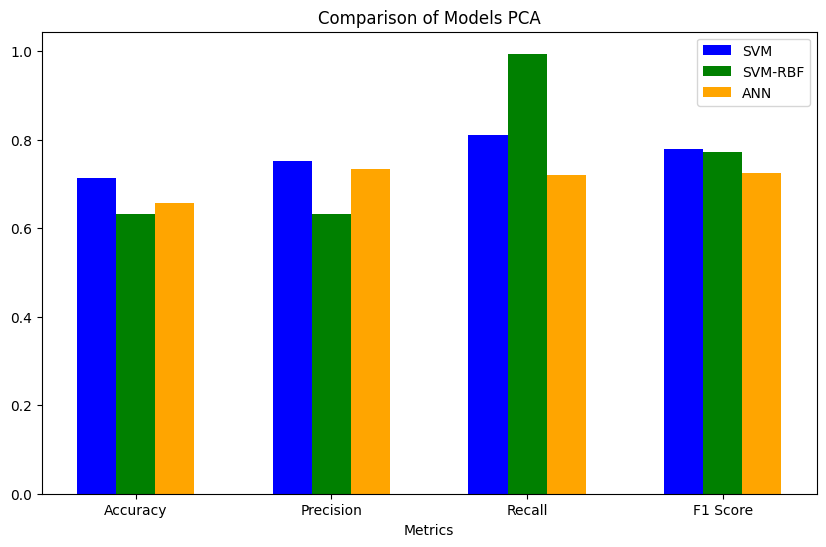

In [ ]:
labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
svm_scores = [avg_accuracy_svm, avg_precision_svm, avg_recall_svm, avg_f1_svm]
svm_rbf_scores = [avg_accuracy_svm_rbf, avg_precision_svm_rbf, avg_recall_svm_rbf, avg_f1_svm_rbf]
ann_scores = [avg_accuracy_ann, avg_precision_ann, avg_recall_ann, avg_f1_ann]

x = np.arange(len(labels))  # the label locations

width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width, svm_scores, width, label='SVM', color='blue')
rects2 = ax.bar(x, svm_rbf_scores, width, label='SVM-RBF', color='green')
rects3 = ax.bar(x + width, ann_scores, width, label='ANN', color='orange')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Metrics')
ax.set_title('Comparison of Models PCA')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

## **KPCA**

In [ ]:
accuracies_svm = []
precisions_svm = []
recalls_svm = []
f1_scores_svm = []

accuracies_svm_rbf = []
precisions_svm_rbf = []
recalls_svm_rbf = []
f1_scores_svm_rbf = []

accuracies_ann = []
precisions_ann = []
recalls_ann = []
f1_scores_ann = []

# Set PCA dimension
dim = 1000

# Define the number of folds
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)  # 5-fold cross-validation

# Define the feature set and labels
X = bc_tcga_normalized.iloc[:, 1:-1]  # Exclude the first column (Hybridization REF) and last (tumor label)
y = bc_tcga_normalized['tumor']

# Perform cross-validation
for train_index, test_index in kf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Apply Kernel PCA
    kpca = KernelPCA(n_components=min(dim, X_train.shape[0], X_train.shape[1]), kernel='rbf')
    X_train_kpca = kpca.fit_transform(X_train)
    X_test_kpca = kpca.transform(X_test)

    # Train and evaluate SVM (linear kernel)
    svm = SVC(kernel='linear', C=1.0, gamma='auto')
    svm.fit(X_train_kpca, y_train)
    predictions_svm = svm.predict(X_test_kpca)
    accuracy_svm = accuracy_score(y_test, predictions_svm)
    precision_svm, recall_svm, f1_svm, _ = precision_recall_fscore_support(y_test, predictions_svm, average='binary', pos_label='yes')

    accuracies_svm.append(accuracy_svm)
    precisions_svm.append(precision_svm)
    recalls_svm.append(recall_svm)
    f1_scores_svm.append(f1_svm)

    # Train and evaluate SVM (RBF kernel)
    svm_rbf = SVC(kernel='rbf', C=1.0, gamma='auto')
    svm_rbf.fit(X_train_kpca, y_train)
    predictions_svm_rbf = svm_rbf.predict(X_test_kpca)
    accuracy_svm_rbf = accuracy_score(y_test, predictions_svm_rbf)
    precision_svm_rbf, recall_svm_rbf, f1_svm_rbf, _ = precision_recall_fscore_support(y_test, predictions_svm_rbf, average='binary', pos_label='yes')

    accuracies_svm_rbf.append(accuracy_svm_rbf)
    precisions_svm_rbf.append(precision_svm_rbf)
    recalls_svm_rbf.append(recall_svm_rbf)
    f1_scores_svm_rbf.append(f1_svm_rbf)

    # Train and evaluate ANN
    ann = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
    ann.fit(X_train_kpca, y_train)
    predictions_ann = ann.predict(X_test_kpca)
    accuracy_ann = accuracy_score(y_test, predictions_ann)
    precision_ann, recall_ann, f1_ann, _ = precision_recall_fscore_support(y_test, predictions_ann, average='binary', pos_label='yes')

    accuracies_ann.append(accuracy_ann)
    precisions_ann.append(precision_ann)
    recalls_ann.append(recall_ann)
    f1_scores_ann.append(f1_ann)

# Calculate average scores across all folds
avg_accuracy_svm = np.mean(accuracies_svm)
avg_precision_svm = np.mean(precisions_svm)
avg_recall_svm = np.mean(recalls_svm)
avg_f1_svm = np.mean(f1_scores_svm)

avg_accuracy_svm_rbf = np.mean(accuracies_svm_rbf)
avg_precision_svm_rbf = np.mean(precisions_svm_rbf)
avg_recall_svm_rbf = np.mean(recalls_svm_rbf)
avg_f1_svm_rbf = np.mean(f1_scores_svm_rbf)

avg_accuracy_ann = np.mean(accuracies_ann)
avg_precision_ann = np.mean(precisions_ann)
avg_recall_ann = np.mean(recalls_ann)
avg_f1_ann = np.mean(f1_scores_ann)

# Print results
print("SVM Results (Linear Kernel):")
print(f"Average Accuracy: {avg_accuracy_svm}")
print(f"Average Precision: {avg_precision_svm}")
print(f"Average Recall: {avg_recall_svm}")
print(f"Average F1 Score: {avg_f1_svm}")

print("\nSVM-RBF Results:")
print(f"Average Accuracy: {avg_accuracy_svm_rbf}")
print(f"Average Precision: {avg_precision_svm_rbf}")
print(f"Average Recall: {avg_recall_svm_rbf}")
print(f"Average F1 Score: {avg_f1_svm_rbf}")

print("\nANN Results:")
print(f"Average Accuracy: {avg_accuracy_ann}")
print(f"Average Precision: {avg_precision_ann}")
print(f"Average Recall: {avg_recall_ann}")
print(f"Average F1 Score: {avg_f1_ann}")

SVM Results (Linear Kernel):
Average Accuracy: 0.9932203389830508
Average Precision: 0.9962962962962962
Average Recall: 0.996208445642408
Average F1 Score: 0.996226036023874

SVM-RBF Results:
Average Accuracy: 0.8966101694915254
Average Precision: 0.8966101694915254
Average Recall: 1.0
Average F1 Score: 0.9454836643177451

ANN Results:
Average Accuracy: 0.9898305084745763
Average Precision: 0.9907234337140878
Average Recall: 0.9980952380952381
Average F1 Score: 0.9943657773077973


In [ ]:
kpca_svm = avg_accuracy_svm
kpca_svmrbf = avg_accuracy_svm_rbf
kpca_ann = avg_accuracy_ann

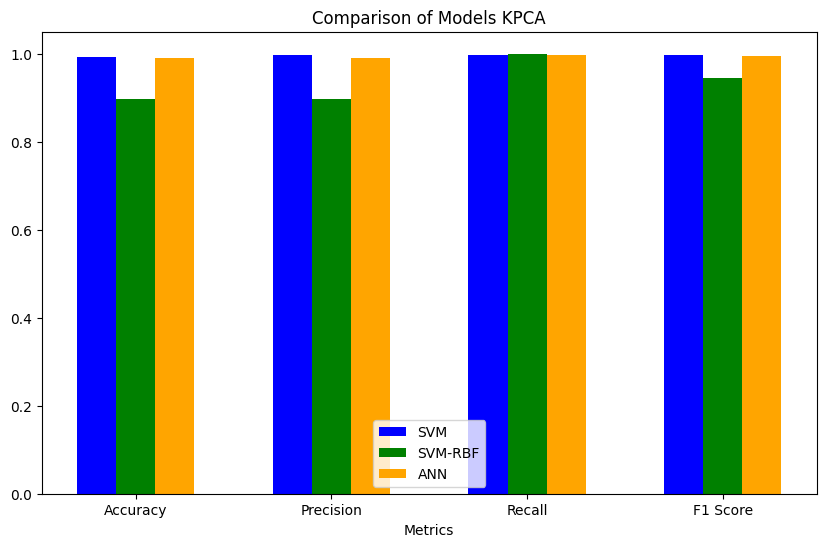

In [ ]:
labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
svm_scores = [avg_accuracy_svm, avg_precision_svm, avg_recall_svm, avg_f1_svm]
svm_rbf_scores = [avg_accuracy_svm_rbf, avg_precision_svm_rbf, avg_recall_svm_rbf, avg_f1_svm_rbf]
ann_scores = [avg_accuracy_ann, avg_precision_ann, avg_recall_ann, avg_f1_ann]

x = np.arange(len(labels))  # the label locations

width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width, svm_scores, width, label='SVM', color='blue')
rects2 = ax.bar(x, svm_rbf_scores, width, label='SVM-RBF', color='green')
rects3 = ax.bar(x + width, ann_scores, width, label='ANN', color='orange')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Metrics')
ax.set_title('Comparison of Models KPCA')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

## **RP+PCA**

In [ ]:
# Set parameters
dim = 1000
n_splits = 5  # Number of folds for cross-validation

# Initialize lists to store metrics
avg_accuracies_svm = []
avg_precision_svm = []
avg_recall_svm = []
avg_f1_svm = []

avg_accuracies_svm_rbf = []
avg_precision_svm_rbf = []
avg_recall_svm_rbf = []
avg_f1_svm_rbf = []

avg_accuracies_ann = []
avg_precision_ann = []
avg_recall_ann = []
avg_f1_ann = []

# Define the feature set and labels
X = bc_tcga_normalized.iloc[:, 1:-1]  # Exclude the first column (Hybridization REF) and last (tumor label)
y = bc_tcga_normalized['tumor']

# Initialize StratifiedKFold
kf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Perform cross-validation
for train_index, test_index in kf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Adjust the number of components for Sparse Random Projection
    n_components_rp = min(dim, X_train.shape[0], X_train.shape[1])
    rp = SparseRandomProjection(n_components=n_components_rp, random_state=42)
    X_train_rp = rp.fit_transform(X_train.iloc[:, 1:-1])
    X_test_rp = rp.transform(X_test.iloc[:, 1:-1])

    # Apply PCA
    pca = PCA(n_components=min(dim, X_train_rp.shape[1]))
    X_train_pca = pca.fit_transform(X_train_rp)
    X_test_pca = pca.transform(X_test_rp)

    # Train and test SVM (linear kernel)
    svm = SVC(kernel='linear', C=1.0, gamma='auto')
    svm.fit(X_train_pca, y_train)
    predictions_svm = svm.predict(X_test_pca)
    accuracy_svm = accuracy_score(y_test, predictions_svm)
    precision_svm, recall_svm, f1_svm, _ = precision_recall_fscore_support(y_test, predictions_svm, average='binary', pos_label='yes')

    avg_accuracies_svm.append(accuracy_svm)
    avg_precision_svm.append(precision_svm)
    avg_recall_svm.append(recall_svm)
    avg_f1_svm.append(f1_svm)

    # Train and test SVM (RBF kernel)
    svm_rbf = SVC(kernel='rbf', C=1.0, gamma='auto')
    svm_rbf.fit(X_train_pca, y_train)
    predictions_svm_rbf = svm_rbf.predict(X_test_pca)
    accuracy_svm_rbf = accuracy_score(y_test, predictions_svm_rbf)
    precision_svm_rbf, recall_svm_rbf, f1_svm_rbf, _ = precision_recall_fscore_support(y_test, predictions_svm_rbf, average='binary', pos_label='yes')

    avg_accuracies_svm_rbf.append(accuracy_svm_rbf)
    avg_precision_svm_rbf.append(precision_svm_rbf)
    avg_recall_svm_rbf.append(recall_svm_rbf)
    avg_f1_svm_rbf.append(f1_svm_rbf)

    # Train and test ANN
    ann = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
    ann.fit(X_train_pca, y_train)
    predictions_ann = ann.predict(X_test_pca)
    accuracy_ann = accuracy_score(y_test, predictions_ann)
    precision_ann, recall_ann, f1_ann, _ = precision_recall_fscore_support(y_test, predictions_ann, average='binary', pos_label='yes')

    avg_accuracies_ann.append(accuracy_ann)
    avg_precision_ann.append(precision_ann)
    avg_recall_ann.append(recall_ann)
    avg_f1_ann.append(f1_ann)

# Calculate average scores
avg_accuracy_svm = np.mean(avg_accuracies_svm)
avg_precision_svm = np.mean(avg_precision_svm)
avg_recall_svm = np.mean(avg_recall_svm)
avg_f1_svm = np.mean(avg_f1_svm)

avg_accuracy_svm_rbf = np.mean(avg_accuracies_svm_rbf)
avg_precision_svm_rbf = np.mean(avg_precision_svm_rbf)
avg_recall_svm_rbf = np.mean(avg_recall_svm_rbf)
avg_f1_svm_rbf = np.mean(avg_f1_svm_rbf)

avg_accuracy_ann = np.mean(avg_accuracies_ann)
avg_precision_ann = np.mean(avg_precision_ann)
avg_recall_ann = np.mean(avg_recall_ann)
avg_f1_ann = np.mean(avg_f1_ann)

# Print results
print("SVM Results:")
print(f"Average Accuracy: {avg_accuracy_svm}")
print(f"Average Precision: {avg_precision_svm}")
print(f"Average Recall: {avg_recall_svm}")
print(f"Average F1 Score: {avg_f1_svm}")

print("\nSVM-RBF Results:")
print(f"Average Accuracy: {avg_accuracy_svm_rbf}")
print(f"Average Precision: {avg_precision_svm_rbf}")
print(f"Average Recall: {avg_recall_svm_rbf}")
print(f"Average F1 Score: {avg_f1_svm_rbf}")

print("\nANN Results:")
print(f"Average Accuracy: {avg_accuracy_ann}")
print(f"Average Precision: {avg_precision_ann}")
print(f"Average Recall: {avg_recall_ann}")
print(f"Average F1 Score: {avg_f1_ann}")


SVM Results:
Average Accuracy: 0.9966101694915255
Average Precision: 1.0
Average Recall: 0.996208445642408
Average F1 Score: 0.9980951949023786

SVM-RBF Results:
Average Accuracy: 0.8966101694915254
Average Precision: 0.8966101694915254
Average Recall: 1.0
Average F1 Score: 0.9454836643177451

ANN Results:
Average Accuracy: 0.9593220338983051
Average Precision: 0.9884604611075201
Average Recall: 0.9660017969451932
Average F1 Score: 0.9770601797803096


In [ ]:
rppca_svm = avg_accuracy_svm
rppca_svmrbf = avg_accuracy_svm_rbf
rppca_ann = avg_accuracy_ann

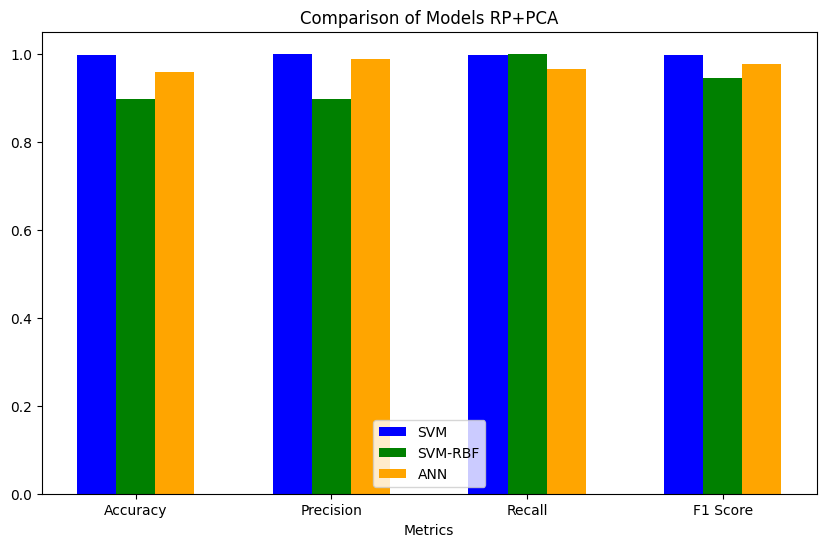

In [ ]:
labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
svm_scores = [avg_accuracy_svm, avg_precision_svm, avg_recall_svm, avg_f1_svm]
svm_rbf_scores = [avg_accuracy_svm_rbf, avg_precision_svm_rbf, avg_recall_svm_rbf, avg_f1_svm_rbf]
ann_scores = [avg_accuracy_ann, avg_precision_ann, avg_recall_ann, avg_f1_ann]

x = np.arange(len(labels))  # the label locations

width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width, svm_scores, width, label='SVM', color='blue')
rects2 = ax.bar(x, svm_rbf_scores, width, label='SVM-RBF', color='green')
rects3 = ax.bar(x + width, ann_scores, width, label='ANN', color='orange')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Metrics')
ax.set_title('Comparison of Models RP+PCA')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

## **SDAE**

In [ ]:
# Set parameters
dim = 1000
n_splits = 5  # Number of folds for cross-validation

# Initialize lists to store metrics
avg_accuracies_svm = []
avg_precision_svm = []
avg_recall_svm = []
avg_f1_svm = []

avg_accuracies_svm_rbf = []
avg_precision_svm_rbf = []
avg_recall_svm_rbf = []
avg_f1_svm_rbf = []

avg_accuracies_ann = []
avg_precision_ann = []
avg_recall_ann = []
avg_f1_ann = []

# Define the feature set and labels
X = bc_tcga_normalized.iloc[:, 1:-1]  # Exclude the first column (Hybridization REF) and last (tumor label)
y = bc_tcga_normalized['tumor']

# Initialize StratifiedKFold
kf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Perform cross-validation
for train_index, test_index in kf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Apply SDAE with noise
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train.iloc[:, 1:-1])
    X_test_scaled = scaler.transform(X_test.iloc[:, 1:-1])

    sdae = Sequential()
    sdae.add(GaussianNoise(0.1, input_shape=(X_train_scaled.shape[1],)))  # Add Gaussian noise to input
    sdae.add(Dense(units=800, activation='relu'))
    sdae.add(GaussianNoise(0.1))
    sdae.add(Dense(units=400, activation='relu'))
    sdae.add(GaussianNoise(0.1))
    sdae.add(Dense(units=200, activation='relu'))
    sdae.add(GaussianNoise(0.1))
    sdae.add(Dense(units=100, activation='relu'))
    sdae.add(GaussianNoise(0.1))
    sdae.add(Dense(units=50, activation='relu'))
    sdae.add(GaussianNoise(0.1))
    sdae.add(Dense(units=25, activation='relu'))
    sdae.add(Dense(units=50, activation='relu'))
    sdae.add(Dense(units=100, activation='relu'))
    sdae.add(Dense(units=200, activation='relu'))
    sdae.add(Dense(units=400, activation='relu'))
    sdae.add(Dense(units=800, activation='relu'))
    sdae.add(Dense(units=X_train_scaled.shape[1], activation='linear'))

    sdae.compile(optimizer='adam', loss='mean_squared_error')

    sdae.fit(X_train_scaled, X_train_scaled, epochs=50, batch_size=32, shuffle=True, validation_data=(X_test_scaled, X_test_scaled), verbose=0)

    X_train_sdae = sdae.predict(X_train_scaled)
    X_test_sdae = sdae.predict(X_test_scaled)

    # Train and test SVM (linear kernel)
    svm = SVC(kernel='linear', C=1.0, gamma='auto')
    svm.fit(X_train_sdae, y_train)
    predictions_svm = svm.predict(X_test_sdae)
    accuracy_svm = accuracy_score(y_test, predictions_svm)
    precision_svm, recall_svm, f1_svm, _ = precision_recall_fscore_support(y_test, predictions_svm, average='binary', pos_label='yes')

    avg_accuracies_svm.append(accuracy_svm)
    avg_precision_svm.append(precision_svm)
    avg_recall_svm.append(recall_svm)
    avg_f1_svm.append(f1_svm)

    # Train and test SVM (RBF kernel)
    svm_rbf = SVC(kernel='rbf', C=1.0, gamma='auto')
    svm_rbf.fit(X_train_sdae, y_train)
    predictions_svm_rbf = svm_rbf.predict(X_test_sdae)
    accuracy_svm_rbf = accuracy_score(y_test, predictions_svm_rbf)
    precision_svm_rbf, recall_svm_rbf, f1_svm_rbf, _ = precision_recall_fscore_support(y_test, predictions_svm_rbf, average='binary', pos_label='yes')

    avg_accuracies_svm_rbf.append(accuracy_svm_rbf)
    avg_precision_svm_rbf.append(precision_svm_rbf)
    avg_recall_svm_rbf.append(recall_svm_rbf)
    avg_f1_svm_rbf.append(f1_svm_rbf)

    # Train and test ANN
    ann = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
    ann.fit(X_train_sdae, y_train)
    predictions_ann = ann.predict(X_test_sdae)
    accuracy_ann = accuracy_score(y_test, predictions_ann)
    precision_ann, recall_ann, f1_ann, _ = precision_recall_fscore_support(y_test, predictions_ann, average='binary', pos_label='yes')

    avg_accuracies_ann.append(accuracy_ann)
    avg_precision_ann.append(precision_ann)
    avg_recall_ann.append(recall_ann)
    avg_f1_ann.append(f1_ann)

# Calculate average scores
avg_accuracy_svm = np.mean(avg_accuracies_svm)
avg_precision_svm = np.mean(avg_precision_svm)
avg_recall_svm = np.mean(avg_recall_svm)
avg_f1_svm = np.mean(avg_f1_svm)

avg_accuracy_svm_rbf = np.mean(avg_accuracies_svm_rbf)
avg_precision_svm_rbf = np.mean(avg_precision_svm_rbf)
avg_recall_svm_rbf = np.mean(avg_recall_svm_rbf)
avg_f1_svm_rbf = np.mean(avg_f1_svm_rbf)

avg_accuracy_ann = np.mean(avg_accuracies_ann)
avg_precision_ann = np.mean(avg_precision_ann)
avg_recall_ann = np.mean(avg_recall_ann)
avg_f1_ann = np.mean(avg_f1_ann)

# Print results
print("SVM Results:")
print(f"Average Accuracy: {avg_accuracy_svm}")
print(f"Average Precision: {avg_precision_svm}")
print(f"Average Recall: {avg_recall_svm}")
print(f"Average F1 Score: {avg_f1_svm}")

print("\nSVM-RBF Results:")
print(f"Average Accuracy: {avg_accuracy_svm_rbf}")
print(f"Average Precision: {avg_precision_svm_rbf}")
print(f"Average Recall: {avg_recall_svm_rbf}")
print(f"Average F1 Score: {avg_f1_svm_rbf}")

print("\nANN Results:")
print(f"Average Accuracy: {avg_accuracy_ann}")
print(f"Average Precision: {avg_precision_ann}")
print(f"Average Recall: {avg_recall_ann}")
print(f"Average F1 Score: {avg_f1_ann}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/regularization/gaussian_noise.py:29: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/regularization/gaussian_noise.py:29: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 110ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/regularization/gaussian_noise.py:29: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/regularization/gaussian_noise.py:29: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/regularization/gaussian_noise.py:29: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 89ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
SVM Results:
Average Accuracy: 0.9881355932203391
Average Precision: 0.9907038584864445
Average Recall: 0.996208445642408
Average F1 Score: 0.9934177479679892

SVM-RBF Results:
Average Accuracy: 0.9898305084745763
Average Precision: 0.9925223755130297
Average Recall: 0.996208445642408
Average F1 Score: 0.9943392447820049

ANN Results:
Average Accuracy: 0.9864406779661017
Average Precision: 0.990703177042455
Average Recall: 0.9943036837376459
Average F1 Score: 0.9924516544937237


In [ ]:
sdae_svm = avg_accuracy_svm
sdae_svmrbf = avg_accuracy_svm_rbf
sdae_ann = avg_accuracy_ann

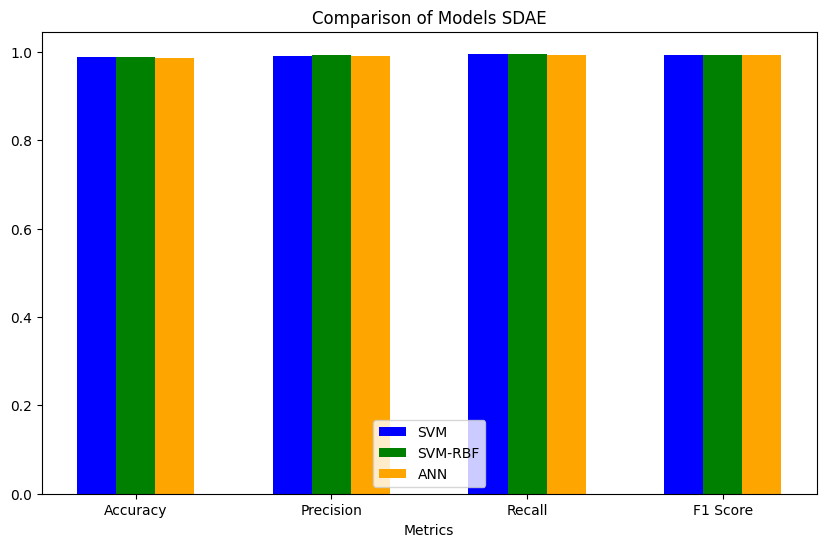

In [ ]:
labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
svm_scores = [avg_accuracy_svm, avg_precision_svm, avg_recall_svm, avg_f1_svm]
svm_rbf_scores = [avg_accuracy_svm_rbf, avg_precision_svm_rbf, avg_recall_svm_rbf, avg_f1_svm_rbf]
ann_scores = [avg_accuracy_ann, avg_precision_ann, avg_recall_ann, avg_f1_ann]

x = np.arange(len(labels))  # the label locations

width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width, svm_scores, width, label='SVM', color='blue')
rects2 = ax.bar(x, svm_rbf_scores, width, label='SVM-RBF', color='green')
rects3 = ax.bar(x + width, ann_scores, width, label='ANN', color='orange')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Metrics')
ax.set_title('Comparison of Models SDAE')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

## **RP+SDAE**

In [ ]:
# Define constants
dim = 1000
iterations = 10

# Initialize dictionaries to store average metrics
avg_metrics = {
    'SVM': {'accuracy': [], 'precision': [], 'recall': [], 'f1': []},
    'SVM-RBF': {'accuracy': [], 'precision': [], 'recall': [], 'f1': []},
    'ANN': {'accuracy': [], 'precision': [], 'recall': [], 'f1': []}
}

def train_sdae(X_train_scaled, X_test_scaled):
    sdae = Sequential()
    sdae.add(GaussianNoise(0.1, input_shape=(X_train_scaled.shape[1],)))  # Add Gaussian noise
    # Define the SDAE architecture
    layers = [800, 400, 200, 100, 50, 25, 50, 100, 200, 400, 800]
    for units in layers:
        sdae.add(Dense(units=units, activation='relu'))
        sdae.add(GaussianNoise(0.1))
    sdae.add(Dense(units=X_train_scaled.shape[1], activation='linear'))

    sdae.compile(optimizer='adam', loss='mean_squared_error')
    sdae.fit(X_train_scaled, X_train_scaled, epochs=50, batch_size=32,
              shuffle=True, validation_data=(X_test_scaled, X_test_scaled), verbose=0)

    return sdae

def evaluate_model(model, X_train_sdae, y_train, X_test_sdae, y_test):
    model.fit(X_train_sdae, y_train)
    predictions = model.predict(X_test_sdae)
    accuracy = accuracy_score(y_test, predictions)
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, predictions, average='binary', pos_label='yes')
    return accuracy, precision, recall, f1

# Run the experiment for defined iterations
for iteration in range(iterations):
    sss = StratifiedShuffleSplit(n_splits=1, test_size=500, random_state=iteration)
    for train_index, test_index in sss.split(bc_tcga_normalized.iloc[:, 1:-1], bc_tcga_normalized['tumor']):
        X_train = bc_tcga_normalized.iloc[train_index]
        X_test = bc_tcga_normalized.iloc[test_index]

    # Apply Random Projection (RP)
    n_components_rp = min(dim, X_train.shape[0], X_train.shape[1])
    rp = SparseRandomProjection(n_components=n_components_rp, random_state=iteration)
    X_train_rp = rp.fit_transform(X_train.iloc[:, 1:-1])
    X_test_rp = rp.transform(X_test.iloc[:, 1:-1])

    # Apply Standard Scaler
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_rp)
    X_test_scaled = scaler.transform(X_test_rp)

    # Train SDAE
    sdae = train_sdae(X_train_scaled, X_test_scaled)
    X_train_sdae = sdae.predict(X_train_scaled)
    X_test_sdae = sdae.predict(X_test_scaled)

    # Train and evaluate SVM
    svm = SVC(kernel='linear', C=1.0, gamma='auto')
    metrics_svm = evaluate_model(svm, X_train_sdae, X_train['tumor'], X_test_sdae, X_test['tumor'])
    avg_metrics['SVM']['accuracy'].append(metrics_svm[0])
    avg_metrics['SVM']['precision'].append(metrics_svm[1])
    avg_metrics['SVM']['recall'].append(metrics_svm[2])
    avg_metrics['SVM']['f1'].append(metrics_svm[3])

    # Train and evaluate SVM-RBF
    svm_rbf = SVC(kernel='rbf', C=1.0, gamma='auto')
    metrics_svm_rbf = evaluate_model(svm_rbf, X_train_sdae, X_train['tumor'], X_test_sdae, X_test['tumor'])
    avg_metrics['SVM-RBF']['accuracy'].append(metrics_svm_rbf[0])
    avg_metrics['SVM-RBF']['precision'].append(metrics_svm_rbf[1])
    avg_metrics['SVM-RBF']['recall'].append(metrics_svm_rbf[2])
    avg_metrics['SVM-RBF']['f1'].append(metrics_svm_rbf[3])

    # Train and evaluate ANN
    ann = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=iteration)
    metrics_ann = evaluate_model(ann, X_train_sdae, X_train['tumor'], X_test_sdae, X_test['tumor'])
    avg_metrics['ANN']['accuracy'].append(metrics_ann[0])
    avg_metrics['ANN']['precision'].append(metrics_ann[1])
    avg_metrics['ANN']['recall'].append(metrics_ann[2])
    avg_metrics['ANN']['f1'].append(metrics_ann[3])

# Calculate and print average scores
for model in avg_metrics:
    print(f"\n{model} Results:")
    print(f"Average Accuracy: {np.mean(avg_metrics[model]['accuracy'])}")
    print(f"Average Precision: {np.mean(avg_metrics[model]['precision'])}")
    print(f"Average Recall: {np.mean(avg_metrics[model]['recall'])}")
    print(f"Average F1 Score: {np.mean(avg_metrics[model]['f1'])}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/regularization/gaussian_noise.py:29: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/regularization/gaussian_noise.py:29: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/regularization/gaussian_noise.py:29: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/regularization/gaussian_noise.py:29: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/regularization/gaussian_noise.py:29: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 165ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/regularization/gaussian_noise.py:29: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/regularization/gaussian_noise.py:29: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/regularization/gaussian_noise.py:29: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/regularization/gaussian_noise.py:29: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/regularization/gaussian_noise.py:29: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

SVM Results:
Average Accuracy: 0.9702
Average Precision: 0.9798030283573288
Average Recall: 0.9872767857142858
Average F1 Score: 0.9834315112597631

SVM-RBF Results:
Average Accuracy: 0.969
Average Precision: 0.976757712283552
Average Recall: 0.9890625
Average F1 Score: 0.9828094803681886

ANN Results:
Average Accuracy: 0.9575999999999999
Average Precision: 0.9846411068633634
Average Recall: 0.9678571428571429
Average F1 Score: 0.9760499375179744


In [ ]:
rpsdae_svm = avg_accuracy_svm
rpsdae_svmrbf = avg_accuracy_svm_rbf
rpsdae_ann = avg_accuracy_ann

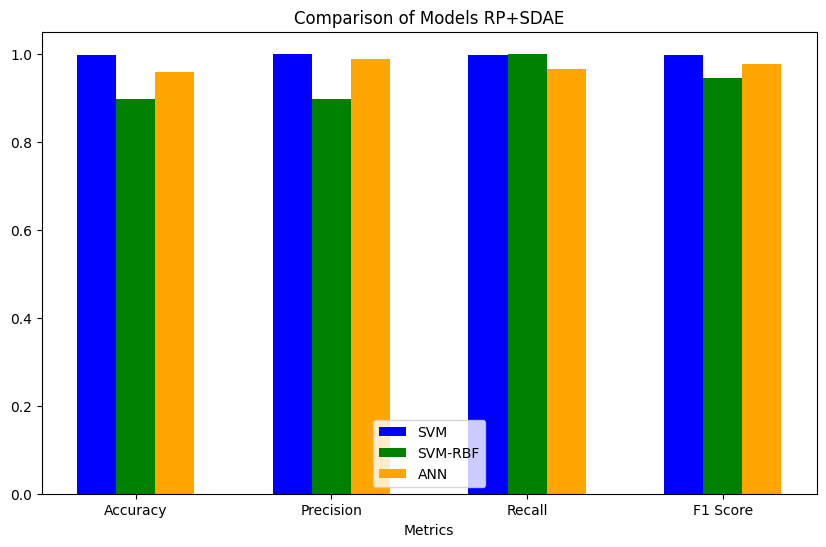

In [ ]:
labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
svm_scores = [avg_accuracy_svm, avg_precision_svm, avg_recall_svm, avg_f1_svm]
svm_rbf_scores = [avg_accuracy_svm_rbf, avg_precision_svm_rbf, avg_recall_svm_rbf, avg_f1_svm_rbf]
ann_scores = [avg_accuracy_ann, avg_precision_ann, avg_recall_ann, avg_f1_ann]

x = np.arange(len(labels))  # the label locations

width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width, svm_scores, width, label='SVM', color='blue')
rects2 = ax.bar(x, svm_rbf_scores, width, label='SVM-RBF', color='green')
rects3 = ax.bar(x + width, ann_scores, width, label='ANN', color='orange')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Metrics')
ax.set_title('Comparison of Models RP+SDAE')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

# **FS+SDAE**

In [ ]:
dim = 1000

# Initialize metrics
avg_accuracies_svm = []
avg_precision_svm = []
avg_recall_svm = []
avg_f1_svm = []

avg_accuracies_svm_rbf = []
avg_precision_svm_rbf = []
avg_recall_svm_rbf = []
avg_f1_svm_rbf = []

avg_accuracies_ann = []
avg_precision_ann = []
avg_recall_ann = []
avg_f1_ann = []

# Stratified K-Folds cross-validator
skf = StratifiedKFold(n_splits=10)

# Prepare the input data
X = bc_tcga_normalized.iloc[:, 1:-1]  # Features
y = bc_tcga_normalized['tumor']         # Labels

# Min-Max Scaling and Feature Selection
scaler = MinMaxScaler()
feature_selector = SelectKBest(chi2, k=dim)

# Cross-validation for each model
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Scaling the data
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Feature Selection
    X_train_fs = feature_selector.fit_transform(X_train_scaled, y_train)
    X_test_fs = feature_selector.transform(X_test_scaled)

    # Train SDAE
    sdae = Sequential()
    sdae.add(GaussianNoise(0.1, input_shape=(X_train_fs.shape[1],)))  # Add Gaussian noise to input
    sdae.add(Dense(units=800, activation='relu'))
    sdae.add(GaussianNoise(0.1))
    sdae.add(Dense(units=400, activation='relu'))
    sdae.add(GaussianNoise(0.1))
    sdae.add(Dense(units=200, activation='relu'))
    sdae.add(GaussianNoise(0.1))
    sdae.add(Dense(units=100, activation='relu'))
    sdae.add(GaussianNoise(0.1))
    sdae.add(Dense(units=50, activation='relu'))
    sdae.add(GaussianNoise(0.1))
    sdae.add(Dense(units=25, activation='relu'))
    sdae.add(Dense(units=50, activation='relu'))
    sdae.add(Dense(units=100, activation='relu'))
    sdae.add(Dense(units=200, activation='relu'))
    sdae.add(Dense(units=400, activation='relu'))
    sdae.add(Dense(units=800, activation='relu'))
    sdae.add(Dense(units=X_train_fs.shape[1], activation='linear'))

    sdae.compile(optimizer='adam', loss='mean_squared_error')
    sdae.fit(X_train_fs, X_train_fs, epochs=50, batch_size=32, shuffle=True, verbose=0)

    # Get encoded data
    X_train_sdae = sdae.predict(X_train_fs)
    X_test_sdae = sdae.predict(X_test_fs)

    # Train and test SVM
    svm = SVC(kernel='linear', C=1.0, gamma='auto')
    predictions_svm = svm.fit(X_train_sdae, y_train).predict(X_test_sdae)
    accuracy_svm = accuracy_score(y_test, predictions_svm)
    precision_svm, recall_svm, f1_svm, _ = precision_recall_fscore_support(y_test, predictions_svm, average='binary', pos_label='yes')

    avg_accuracies_svm.append(accuracy_svm)
    avg_precision_svm.append(precision_svm)
    avg_recall_svm.append(recall_svm)
    avg_f1_svm.append(f1_svm)

    # Train and test SVM-RBF
    svm_rbf = SVC(kernel='rbf', C=1.0, gamma='auto')
    predictions_svm_rbf = svm_rbf.fit(X_train_sdae, y_train).predict(X_test_sdae)
    accuracy_svm_rbf = accuracy_score(y_test, predictions_svm_rbf)
    precision_svm_rbf, recall_svm_rbf, f1_svm_rbf, _ = precision_recall_fscore_support(y_test, predictions_svm_rbf, average='binary', pos_label='yes')

    avg_accuracies_svm_rbf.append(accuracy_svm_rbf)
    avg_precision_svm_rbf.append(precision_svm_rbf)
    avg_recall_svm_rbf.append(recall_svm_rbf)
    avg_f1_svm_rbf.append(f1_svm_rbf)

    # Train and test ANN
    ann = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000)
    predictions_ann = ann.fit(X_train_sdae, y_train).predict(X_test_sdae)
    accuracy_ann = accuracy_score(y_test, predictions_ann)
    precision_ann, recall_ann, f1_ann, _ = precision_recall_fscore_support(y_test, predictions_ann, average='binary', pos_label='yes')

    avg_accuracies_ann.append(accuracy_ann)
    avg_precision_ann.append(precision_ann)
    avg_recall_ann.append(recall_ann)
    avg_f1_ann.append(f1_ann)

# Calculate average scores
avg_accuracy_svm = np.mean(avg_accuracies_svm)
avg_precision_svm = np.mean(avg_precision_svm)
avg_recall_svm = np.mean(avg_recall_svm)
avg_f1_svm = np.mean(avg_f1_svm)

avg_accuracy_svm_rbf = np.mean(avg_accuracies_svm_rbf)
avg_precision_svm_rbf = np.mean(avg_precision_svm_rbf)
avg_recall_svm_rbf = np.mean(avg_recall_svm_rbf)
avg_f1_svm_rbf = np.mean(avg_f1_svm_rbf)

avg_accuracy_ann = np.mean(avg_accuracies_ann)
avg_precision_ann = np.mean(avg_precision_ann)
avg_recall_ann = np.mean(avg_recall_ann)
avg_f1_ann = np.mean(avg_f1_ann)

# Print results
print("SVM Results:")
print(f"Average Accuracy: {avg_accuracy_svm}")
print(f"Average Precision: {avg_precision_svm}")
print(f"Average Recall: {avg_recall_svm}")
print(f"Average F1 Score: {avg_f1_svm}")

print("\nSVM-RBF Results:")
print(f"Average Accuracy: {avg_accuracy_svm_rbf}")
print(f"Average Precision: {avg_precision_svm_rbf}")
print(f"Average Recall: {avg_recall_svm_rbf}")
print(f"Average F1 Score: {avg_f1_svm_rbf}")

print("\nANN Results:")
print(f"Average Accuracy: {avg_accuracy_ann}")
print(f"Average Precision: {avg_precision_ann}")
print(f"Average Recall: {avg_recall_ann}")
print(f"Average F1 Score: {avg_f1_ann}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/regularization/gaussian_noise.py:29: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/regularization/gaussian_noise.py:29: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/regularization/gaussian_noise.py:29: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/regularization/gaussian_noise.py:29: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/regularization/gaussian_noise.py:29: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/regularization/gaussian_noise.py:29: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/regularization/gaussian_noise.py:29: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/regularization/gaussian_noise.py:29: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/regularization/gaussian_noise.py:29: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/regularization/gaussian_noise.py:29: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
SVM Results:
Average Accuracy: 0.9898305084745763
Average Precision: 0.9944444444444445
Average Recall: 0.9943396226415094
Average F1 Score: 0.9943208038067851

SVM-RBF Results:
Average Accuracy: 0.9915254237288135
Average Precision: 0.9944444444444445
Average Recall: 0.9962264150943396
Average F1 Score: 0.995291499777481

ANN Results:
Average Accuracy: 0.9898305084745763
Average Precision: 0.9926599326599327
Average Recall: 0.9962264150943396
Average F1 Score: 0.9943742273648816


In [ ]:
fssdae_svm = avg_accuracy_svm
fssdae_svmrbf = avg_accuracy_svm_rbf
fssdae_ann = avg_accuracy_ann

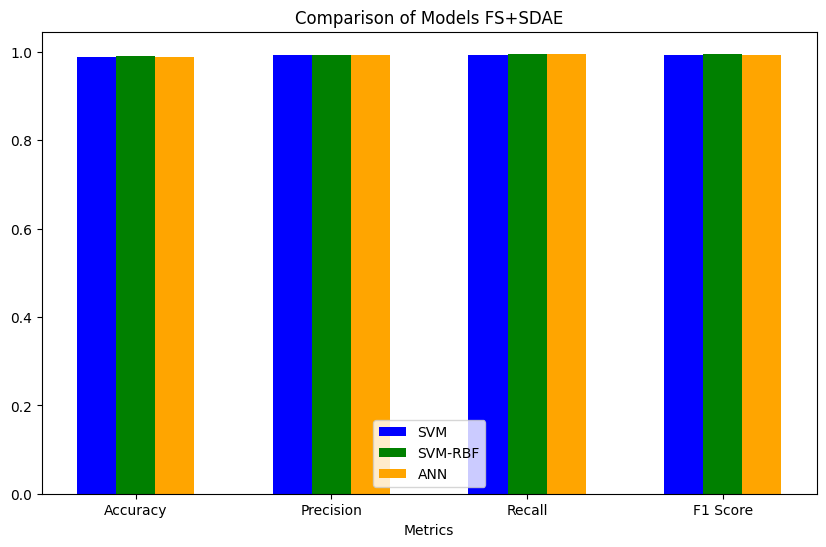

In [ ]:
labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
svm_scores = [avg_accuracy_svm, avg_precision_svm, avg_recall_svm, avg_f1_svm]
svm_rbf_scores = [avg_accuracy_svm_rbf, avg_precision_svm_rbf, avg_recall_svm_rbf, avg_f1_svm_rbf]
ann_scores = [avg_accuracy_ann, avg_precision_ann, avg_recall_ann, avg_f1_ann]

x = np.arange(len(labels))  # the label locations

width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width, svm_scores, width, label='SVM', color='blue')
rects2 = ax.bar(x, svm_rbf_scores, width, label='SVM-RBF', color='green')
rects3 = ax.bar(x + width, ann_scores, width, label='ANN', color='orange')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Metrics')
ax.set_title('Comparison of Models FS+SDAE')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

In [ ]:
from tabulate import tabulate

# Convert accuracies to percentage
def format_percentage(accuracy):
    return f'{accuracy * 100:.2f}%'

# Define the accuracies and models
data = [
    ['PCA', format_percentage(pca_svm), format_percentage(pca_svmrbf), format_percentage(pca_ann)],
    ['KPCA', format_percentage(kpca_svm), format_percentage(kpca_svmrbf), format_percentage(kpca_ann)],
    ['RP+PCA', format_percentage(rppca_svm), format_percentage(rppca_svmrbf), format_percentage(rppca_ann)],
    ['SDAE', format_percentage(sdae_svm), format_percentage(sdae_svmrbf), format_percentage(sdae_ann)],
    ['RP+SDAE', format_percentage(rpsdae_svm), format_percentage(rpsdae_svmrbf), format_percentage(rpsdae_ann)],
    ['FS+SDAE', format_percentage(fssdae_svm), format_percentage(fssdae_svmrbf), format_percentage(fssdae_ann)]
]

headers = ['Model', 'SVM', 'SVM-RBF', 'ANN']

# Print the table
print(tabulate(data, headers=headers, tablefmt='grid'))


+---------+--------+-----------+--------+
| Model   | SVM    | SVM-RBF   | ANN    |
+=========+========+===========+========+
| PCA     | 99.83% | 89.66%    | 98.98% |
+---------+--------+-----------+--------+
| KPCA    | 99.32% | 89.66%    | 98.98% |
+---------+--------+-----------+--------+
| RP+PCA  | 99.66% | 89.66%    | 95.93% |
+---------+--------+-----------+--------+
| SDAE    | 98.81% | 98.98%    | 98.64% |
+---------+--------+-----------+--------+
| RP+SDAE | 99.66% | 89.66%    | 95.93% |
+---------+--------+-----------+--------+
| FS+SDAE | 98.98% | 99.15%    | 98.98% |
+---------+--------+-----------+--------+


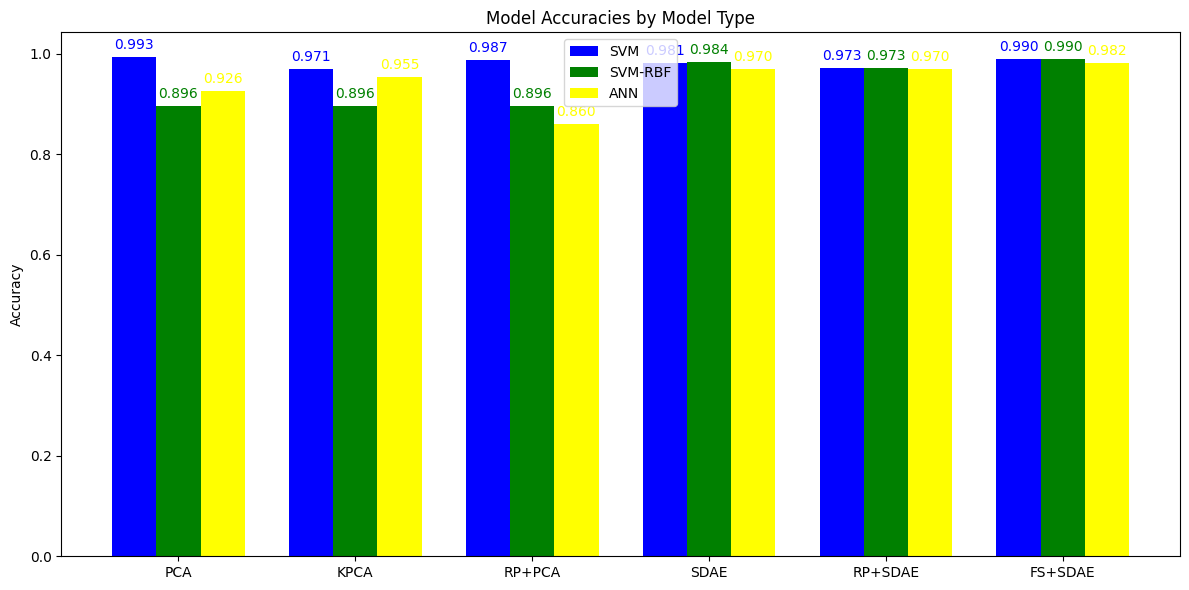

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the variables with accuracies
accuracies_svm = [pca_svm, kpca_svm, rppca_svm, sdae_svm, rpsdae_svm, fssdae_svm]
accuracies_svm_rbf = [pca_svmrbf, kpca_svmrbf, rppca_svmrbf, sdae_svmrbf, rpsdae_svmrbf, fssdae_svmrbf]
accuracies_ann = [pca_ann, kpca_ann, rppca_ann, sdae_ann, rpsdae_ann, fssdae_ann]

# Define the corresponding model names
models = ['PCA', 'KPCA', 'RP+PCA', 'SDAE', 'RP+SDAE', 'FS+SDAE']

# Create a bar plot with different colors for SVM, SVM-RBF, and ANN
bar_width = 0.25
index = np.arange(len(models))

plt.figure(figsize=(12, 6))

plt.bar(index - bar_width, accuracies_svm, bar_width, label='SVM', color='blue')
plt.bar(index, accuracies_svm_rbf, bar_width, label='SVM-RBF', color='green')
plt.bar(index + bar_width, accuracies_ann, bar_width, label='ANN', color='yellow')

plt.xticks(index, models)
plt.ylabel('Accuracy')
plt.title('Model Accuracies by Model Type')

# Add accuracy values on top of the bars
for i, value in enumerate(accuracies_svm):
    plt.text(i - bar_width, value + 0.01, f'{value:.3f}', ha='center', va='bottom', color='blue')

for i, value in enumerate(accuracies_svm_rbf):
    plt.text(i, value + 0.01, f'{value:.3f}', ha='center', va='bottom', color='green')

for i, value in enumerate(accuracies_ann):
    plt.text(i + bar_width, value + 0.01, f'{value:.3f}', ha='center', va='bottom', color='yellow')

plt.legend()
plt.tight_layout()

# Show the plot
plt.show()


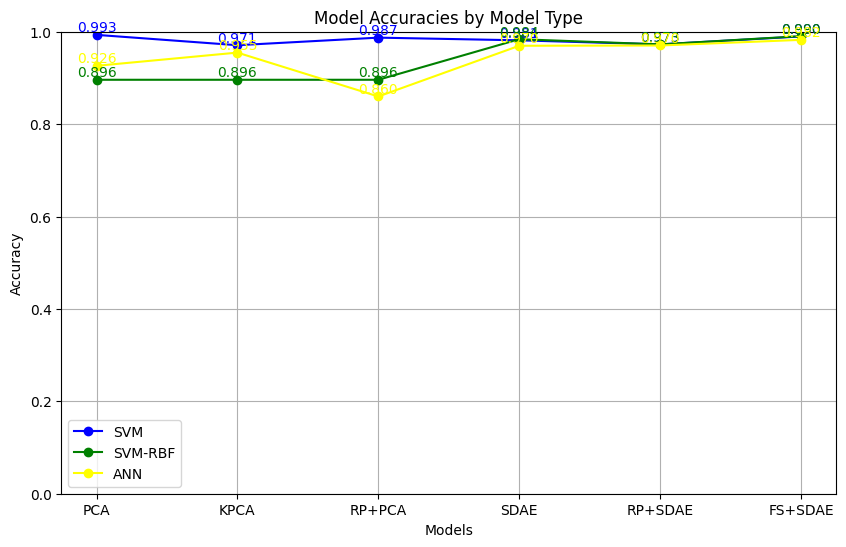

In [ ]:
accuracies_svm = [pca_svm, kpca_svm, rppca_svm, sdae_svm, rpsdae_svm, fssdae_svm]
accuracies_svm_rbf = [pca_svmrbf, kpca_svmrbf, rppca_svmrbf, sdae_svmrbf, rpsdae_svmrbf, fssdae_svmrbf]
accuracies_ann = [pca_ann, kpca_ann, rppca_ann, sdae_ann, rpsdae_ann, fssdae_ann]

# Define the corresponding model names
models = ['PCA', 'KPCA', 'RP+PCA', 'SDAE', 'RP+SDAE', 'FS+SDAE']

# Plot the accuracies using a line plot
plt.figure(figsize=(10, 6))

plt.plot(models, accuracies_svm, marker='o', label='SVM', color='blue')
plt.plot(models, accuracies_svm_rbf, marker='o', label='SVM-RBF', color='green')
plt.plot(models, accuracies_ann, marker='o', label='ANN', color='yellow')

plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracies by Model Type')
plt.legend()
plt.grid(True)
plt.ylim(0, 1)  # Set the y-axis limit between 0 and 1 for accuracy values

# Annotate points with accuracy values
for i, (svm_acc, svm_rbf_acc, ann_acc) in enumerate(zip(accuracies_svm, accuracies_svm_rbf, accuracies_ann)):
    plt.text(i, svm_acc, f'{svm_acc:.3f}', ha='center', va='bottom', color='blue')
    plt.text(i, svm_rbf_acc, f'{svm_rbf_acc:.3f}', ha='center', va='bottom', color='green')
    plt.text(i, ann_acc, f'{ann_acc:.3f}', ha='center', va='bottom', color='yellow')

# Show the plot
plt.show()


--------------------------------------------------------------------------------

# **GSE2034**

# **DATA PREPROCESSING**

## **Replacing NAN values & Precessing by Z scores**

In [ ]:
# Drop unnecessary columns
gse2034_data = gse2034.drop(columns=['Hybridization REF', 'tumor'])

# Separate the data into tumor and non-tumor groups
tumor_data = gse2034_data[gse2034['tumor'] == 'yes']
normal_data = gse2034_data[gse2034['tumor'] == 'no']

# Calculate mean values for each group
tumor_mean = tumor_data.mean()
normal_mean = normal_data.mean()

# Fill missing values with mean values
gse2034_data_tumor_filled = tumor_data.fillna(tumor_mean)
gse2034_data_normal_filled = normal_data.fillna(normal_mean)

# Concatenate the filled data back together
gse2034_data_filled = pd.concat([gse2034_data_tumor_filled, gse2034_data_normal_filled])

# Get the 'Hybridization REF' column
hybridization_ref = gse2034['Hybridization REF']

# Add 'Hybridization REF' and 'tumor' columns back
gse2034_data_filled = pd.concat([hybridization_ref, gse2034_data_filled, gse2034['tumor']], axis=1)

# Save the preprocessed data
gse2034_data_filled.to_csv('Preprocessed_GSE2034_Filled.csv', index=False)

# Apply Z-score normalization
data_values = gse2034_data_filled.iloc[:, 1:-1].values
scaler = StandardScaler()
normalized_data = scaler.fit_transform(data_values)

# Create a DataFrame with the normalized values
gse2034_normalized = pd.DataFrame(data=normalized_data, columns=gse2034_data_filled.columns[1:-1])

# Add 'Hybridization REF' and 'tumor' columns back
gse2034_normalized = pd.concat([hybridization_ref, gse2034_normalized, gse2034['tumor']], axis=1)

# Save the preprocessed data
gse2034_normalized.to_csv('Preprocessed_GSE2034_Normalized.csv', index=False)


In [ ]:
gse2034_normalized

,Hybridization REF,2,9,10,12,13,14,15,16,18,...,100133941,100134017,100134018,100134128,100134401,100134498,100134713,100169750,100170939,tumor
0,GSM36815,0.632731,0.596785,0.164164,0.809088,1.420626,0.400765,-0.915739,-1.360040,0.587272,...,0.541615,1.131512,-2.239323,-1.280722,0.145848,-0.130576,0.375949,-0.674359,1.132428,no
1,GSM37024,-0.776023,-0.311516,-0.154155,0.332570,-0.434438,0.286125,-0.020350,0.205761,1.305808,...,0.661839,-0.549147,-0.673014,-0.088736,-0.157882,0.845925,0.582457,0.669769,-0.246563,yes
2,GSM36824,0.441832,-1.113860,-0.604271,0.580392,0.012633,-2.483527,0.754898,0.265957,-1.608127,...,0.393131,0.472751,0.014069,-0.297231,-0.495410,-0.506407,-2.422556,-0.530924,-1.154966,yes
3,GSM36916,1.180401,1.439185,0.596531,0.497405,2.250838,-2.014767,2.239741,-1.388227,0.340648,...,-0.417551,1.003029,0.827086,-1.135584,0.578460,-1.177861,-1.322240,-0.281213,0.728934,yes
4,GSM36942,-0.582509,0.867925,-0.134115,-0.118367,-0.425947,-3.095438,-0.832780,-1.534564,-0.804596,...,0.578657,-0.558317,0.999569,-1.119975,-1.266051,-0.495100,-0.071244,0.251641,0.332084,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,GSM36883,0.070691,-0.143364,0.236218,-1.473260,-1.155208,-0.630445,0.995563,0.340446,-0.453338,...,0.746201,1.167772,0.412748,-0.171878,1.293152,0.196795,-0.632920,1.120355,0.994225,yes
282,GSM36998,-0.466150,0.251505,-0.538027,-0.003399,-0.654718,-0.285410,-0.193213,-1.359579,-0.249510,...,0.294778,-0.268074,-0.286023,-1.242546,0.247154,-1.145231,0.556438,-0.569079,0.102046,no
283,GSM37058,0.577957,0.008894,-1.005947,0.040711,1.709265,0.404375,-1.797624,-0.822405,-0.209515,...,-0.217646,0.829854,0.007208,-0.830696,-1.399319,1.428710,0.791886,-1.052116,-0.318103,no
284,GSM37033,0.658534,0.594784,-0.050688,0.640132,1.145106,0.648031,-0.207154,-0.029190,0.485826,...,0.616463,-0.695272,0.529946,-0.890890,0.187936,1.359680,0.415114,1.152457,-1.125085,yes


# **PCA**

In [ ]:
# Initialize lists to store metrics
accuracies_svm = []
precisions_svm = []
recalls_svm = []
f1_scores_svm = []

accuracies_svm_rbf = []
precisions_svm_rbf = []
recalls_svm_rbf = []
f1_scores_svm_rbf = []

accuracies_ann = []
precisions_ann = []
recalls_ann = []
f1_scores_ann = []

# Define the number of folds
kf = StratifiedKFold(n_splits=5)  # 5-fold cross-validation

# Define the feature set and labels
X = gse2034_normalized.iloc[:, 1:-1]  # Exclude the first column (Hybridization REF) and last (tumor label)
y = gse2034_normalized['tumor']

# Perform cross-validation
for train_index, test_index in kf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train and evaluate SVM (linear kernel)
    svm = SVC(kernel='linear', C=1.0, gamma='auto')
    svm.fit(X_train, y_train)
    predictions_svm = svm.predict(X_test)
    accuracy_svm = accuracy_score(y_test, predictions_svm)
    precision_svm, recall_svm, f1_svm, _ = precision_recall_fscore_support(y_test, predictions_svm, average='binary', pos_label='yes')

    accuracies_svm.append(accuracy_svm)
    precisions_svm.append(precision_svm)
    recalls_svm.append(recall_svm)
    f1_scores_svm.append(f1_svm)

    # Train and evaluate SVM (RBF kernel)
    svm_rbf = SVC(kernel='rbf', C=1.0, gamma='auto')
    svm_rbf.fit(X_train, y_train)
    predictions_svm_rbf = svm_rbf.predict(X_test)
    accuracy_svm_rbf = accuracy_score(y_test, predictions_svm_rbf)
    precision_svm_rbf, recall_svm_rbf, f1_svm_rbf, _ = precision_recall_fscore_support(y_test, predictions_svm_rbf, average='binary', pos_label='yes')

    accuracies_svm_rbf.append(accuracy_svm_rbf)
    precisions_svm_rbf.append(precision_svm_rbf)
    recalls_svm_rbf.append(recall_svm_rbf)
    f1_scores_svm_rbf.append(f1_svm_rbf)

    # Train and evaluate ANN
    ann = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
    ann.fit(X_train, y_train)
    predictions_ann = ann.predict(X_test)
    accuracy_ann = accuracy_score(y_test, predictions_ann)
    precision_ann, recall_ann, f1_ann, _ = precision_recall_fscore_support(y_test, predictions_ann, average='binary', pos_label='yes')

    accuracies_ann.append(accuracy_ann)
    precisions_ann.append(precision_ann)
    recalls_ann.append(recall_ann)
    f1_scores_ann.append(f1_ann)

# Calculate average scores across all folds
avg_accuracy_svm = np.mean(accuracies_svm)
avg_precision_svm = np.mean(precisions_svm)
avg_recall_svm = np.mean(recalls_svm)
avg_f1_svm = np.mean(f1_scores_svm)

avg_accuracy_svm_rbf = np.mean(accuracies_svm_rbf)
avg_precision_svm_rbf = np.mean(precisions_svm_rbf)
avg_recall_svm_rbf = np.mean(recalls_svm_rbf)
avg_f1_svm_rbf = np.mean(f1_scores_svm_rbf)

avg_accuracy_ann = np.mean(accuracies_ann)
avg_precision_ann = np.mean(precisions_ann)
avg_recall_ann = np.mean(recalls_ann)
avg_f1_ann = np.mean(f1_scores_ann)

# Print results
print("SVM Results (Linear Kernel):")
print(f"Average Accuracy: {avg_accuracy_svm}")
print(f"Average Precision: {avg_precision_svm}")
print(f"Average Recall: {avg_recall_svm}")
print(f"Average F1 Score: {avg_f1_svm}")

print("\nSVM-RBF Results:")
print(f"Average Accuracy: {avg_accuracy_svm_rbf}")
print(f"Average Precision: {avg_precision_svm_rbf}")
print(f"Average Recall: {avg_recall_svm_rbf}")
print(f"Average F1 Score: {avg_f1_svm_rbf}")

print("\nANN Results:")
print(f"Average Accuracy: {avg_accuracy_ann}")
print(f"Average Precision: {avg_precision_ann}")
print(f"Average Recall: {avg_recall_ann}")
print(f"Average F1 Score: {avg_f1_ann}")


SVM Results (Linear Kernel):
Average Accuracy: 0.713309134906231
Average Precision: 0.7521873726524889
Average Recall: 0.8098412698412698
Average F1 Score: 0.7792151403304516

SVM-RBF Results:
Average Accuracy: 0.6328493647912886
Average Precision: 0.631203007518797
Average Recall: 0.9944444444444445
Average F1 Score: 0.7722192253749057

ANN Results:
Average Accuracy: 0.6572897761645493
Average Precision: 0.7340053050397879
Average Recall: 0.7203174603174602
Average F1 Score: 0.723778677462888


In [ ]:
pca_svm = avg_accuracy_svm
pca_svmrbf = avg_accuracy_svm_rbf
pca_ann = avg_accuracy_ann

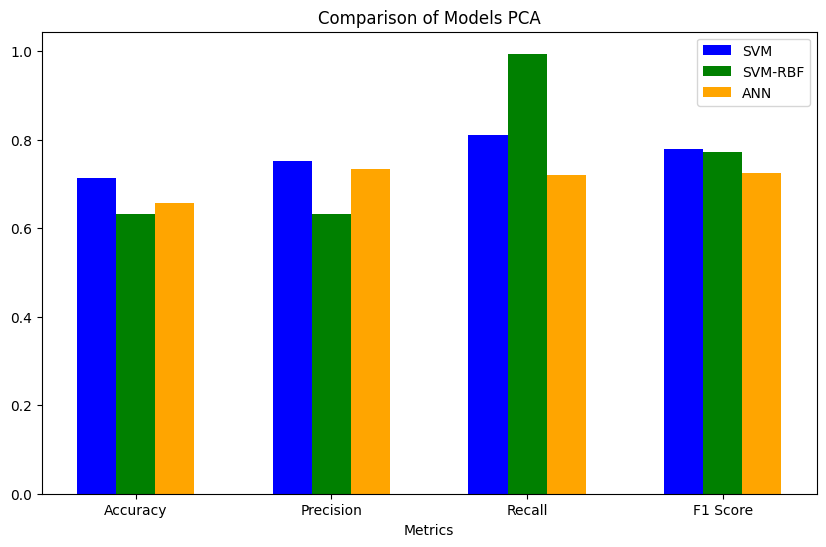

In [ ]:
labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
svm_scores = [avg_accuracy_svm, avg_precision_svm, avg_recall_svm, avg_f1_svm]
svm_rbf_scores = [avg_accuracy_svm_rbf, avg_precision_svm_rbf, avg_recall_svm_rbf, avg_f1_svm_rbf]
ann_scores = [avg_accuracy_ann, avg_precision_ann, avg_recall_ann, avg_f1_ann]

x = np.arange(len(labels))  # the label locations

width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width, svm_scores, width, label='SVM', color='blue')
rects2 = ax.bar(x, svm_rbf_scores, width, label='SVM-RBF', color='green')
rects3 = ax.bar(x + width, ann_scores, width, label='ANN', color='orange')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Metrics')
ax.set_title('Comparison of Models PCA')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

# **KPCA**

In [ ]:
accuracies_svm = []
precisions_svm = []
recalls_svm = []
f1_scores_svm = []

accuracies_svm_rbf = []
precisions_svm_rbf = []
recalls_svm_rbf = []
f1_scores_svm_rbf = []

accuracies_ann = []
precisions_ann = []
recalls_ann = []
f1_scores_ann = []

# Set PCA dimension
dim = 500

# Define the number of folds
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)  # 5-fold cross-validation

# Define the feature set and labels
X = gse2034_normalized.iloc[:, 1:-1]  # Exclude the first column (Hybridization REF) and last (tumor label)
y = gse2034_normalized['tumor']

# Perform cross-validation
for train_index, test_index in kf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Apply Kernel PCA
    kpca = KernelPCA(n_components=min(dim, X_train.shape[0], X_train.shape[1]), kernel='rbf')
    X_train_kpca = kpca.fit_transform(X_train)
    X_test_kpca = kpca.transform(X_test)

    # Train and evaluate SVM (linear kernel)
    svm = SVC(kernel='linear', C=1.0, gamma='auto')
    svm.fit(X_train_kpca, y_train)
    predictions_svm = svm.predict(X_test_kpca)
    accuracy_svm = accuracy_score(y_test, predictions_svm)
    precision_svm, recall_svm, f1_svm, _ = precision_recall_fscore_support(y_test, predictions_svm, average='binary', pos_label='yes')

    accuracies_svm.append(accuracy_svm)
    precisions_svm.append(precision_svm)
    recalls_svm.append(recall_svm)
    f1_scores_svm.append(f1_svm)

    # Train and evaluate SVM (RBF kernel)
    svm_rbf = SVC(kernel='rbf', C=1.0, gamma='auto')
    svm_rbf.fit(X_train_kpca, y_train)
    predictions_svm_rbf = svm_rbf.predict(X_test_kpca)
    accuracy_svm_rbf = accuracy_score(y_test, predictions_svm_rbf)
    precision_svm_rbf, recall_svm_rbf, f1_svm_rbf, _ = precision_recall_fscore_support(y_test, predictions_svm_rbf, average='binary', pos_label='yes')

    accuracies_svm_rbf.append(accuracy_svm_rbf)
    precisions_svm_rbf.append(precision_svm_rbf)
    recalls_svm_rbf.append(recall_svm_rbf)
    f1_scores_svm_rbf.append(f1_svm_rbf)

    # Train and evaluate ANN
    ann = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
    ann.fit(X_train_kpca, y_train)
    predictions_ann = ann.predict(X_test_kpca)
    accuracy_ann = accuracy_score(y_test, predictions_ann)
    precision_ann, recall_ann, f1_ann, _ = precision_recall_fscore_support(y_test, predictions_ann, average='binary', pos_label='yes')

    accuracies_ann.append(accuracy_ann)
    precisions_ann.append(precision_ann)
    recalls_ann.append(recall_ann)
    f1_scores_ann.append(f1_ann)

# Calculate average scores across all folds
avg_accuracy_svm = np.mean(accuracies_svm)
avg_precision_svm = np.mean(precisions_svm)
avg_recall_svm = np.mean(recalls_svm)
avg_f1_svm = np.mean(f1_scores_svm)

avg_accuracy_svm_rbf = np.mean(accuracies_svm_rbf)
avg_precision_svm_rbf = np.mean(precisions_svm_rbf)
avg_recall_svm_rbf = np.mean(recalls_svm_rbf)
avg_f1_svm_rbf = np.mean(f1_scores_svm_rbf)

avg_accuracy_ann = np.mean(accuracies_ann)
avg_precision_ann = np.mean(precisions_ann)
avg_recall_ann = np.mean(recalls_ann)
avg_f1_ann = np.mean(f1_scores_ann)

# Print results
print("SVM Results (Linear Kernel):")
print(f"Average Accuracy: {avg_accuracy_svm}")
print(f"Average Precision: {avg_precision_svm}")
print(f"Average Recall: {avg_recall_svm}")
print(f"Average F1 Score: {avg_f1_svm}")

print("\nSVM-RBF Results:")
print(f"Average Accuracy: {avg_accuracy_svm_rbf}")
print(f"Average Precision: {avg_precision_svm_rbf}")
print(f"Average Recall: {avg_recall_svm_rbf}")
print(f"Average F1 Score: {avg_f1_svm_rbf}")

print("\nANN Results:")
print(f"Average Accuracy: {avg_accuracy_ann}")
print(f"Average Precision: {avg_precision_ann}")
print(f"Average Recall: {avg_recall_ann}")
print(f"Average F1 Score: {avg_f1_ann}")


SVM Results (Linear Kernel):
Average Accuracy: 0.6433151845130066
Average Precision: 0.6392449655607549
Average Recall: 0.9888888888888889
Average F1 Score: 0.7763001685862836

SVM-RBF Results:
Average Accuracy: 0.6258923169993951
Average Precision: 0.6258923169993951
Average Recall: 1.0
Average F1 Score: 0.7698815314374385

ANN Results:
Average Accuracy: 0.6468844525105867
Average Precision: 0.6613845538215285
Average Recall: 0.8938095238095236
Average F1 Score: 0.7598722860791826


In [ ]:
kpca_svm = avg_accuracy_svm
kpca_svmrbf = avg_accuracy_svm_rbf
kpca_ann = avg_accuracy_ann

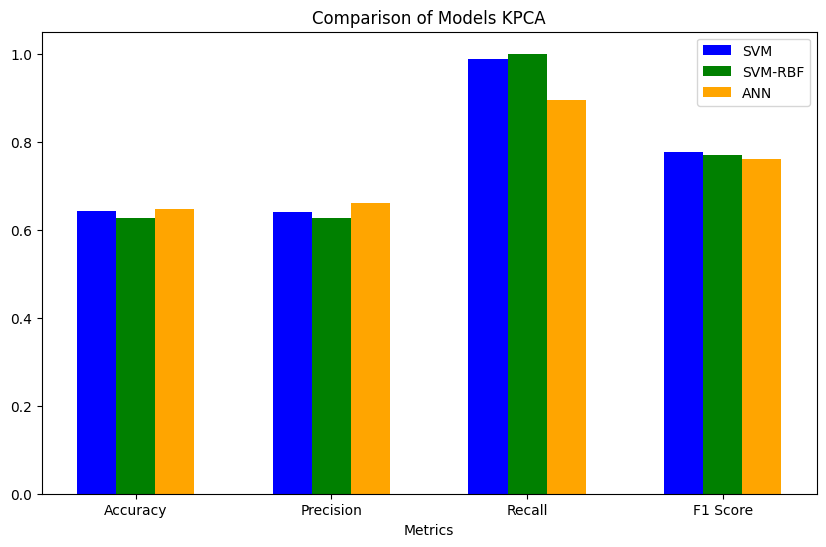

In [ ]:
labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
svm_scores = [avg_accuracy_svm, avg_precision_svm, avg_recall_svm, avg_f1_svm]
svm_rbf_scores = [avg_accuracy_svm_rbf, avg_precision_svm_rbf, avg_recall_svm_rbf, avg_f1_svm_rbf]
ann_scores = [avg_accuracy_ann, avg_precision_ann, avg_recall_ann, avg_f1_ann]

x = np.arange(len(labels))  # the label locations

width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width, svm_scores, width, label='SVM', color='blue')
rects2 = ax.bar(x, svm_rbf_scores, width, label='SVM-RBF', color='green')
rects3 = ax.bar(x + width, ann_scores, width, label='ANN', color='orange')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Metrics')
ax.set_title('Comparison of Models KPCA')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

# **RP+PCA**

In [ ]:
# Set parameters
dim = 500
n_splits = 5  # Number of folds for cross-validation

# Initialize lists to store metrics
avg_accuracies_svm = []
avg_precision_svm = []
avg_recall_svm = []
avg_f1_svm = []

avg_accuracies_svm_rbf = []
avg_precision_svm_rbf = []
avg_recall_svm_rbf = []
avg_f1_svm_rbf = []

avg_accuracies_ann = []
avg_precision_ann = []
avg_recall_ann = []
avg_f1_ann = []

# Define the feature set and labels
X = gse2034_normalized.iloc[:, 1:-1]  # Exclude the first column (Hybridization REF) and last (tumor label)
y = gse2034_normalized['tumor']

# Initialize StratifiedKFold
kf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Perform cross-validation
for train_index, test_index in kf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Adjust the number of components for Sparse Random Projection
    n_components_rp = min(dim, X_train.shape[0], X_train.shape[1])
    rp = SparseRandomProjection(n_components=n_components_rp, random_state=42)
    X_train_rp = rp.fit_transform(X_train.iloc[:, 1:-1])
    X_test_rp = rp.transform(X_test.iloc[:, 1:-1])

    # Apply PCA
    pca = PCA(n_components=min(dim, X_train_rp.shape[1]))
    X_train_pca = pca.fit_transform(X_train_rp)
    X_test_pca = pca.transform(X_test_rp)

    # Train and test SVM (linear kernel)
    svm = SVC(kernel='linear', C=1.0, gamma='auto')
    svm.fit(X_train_pca, y_train)
    predictions_svm = svm.predict(X_test_pca)
    accuracy_svm = accuracy_score(y_test, predictions_svm)
    precision_svm, recall_svm, f1_svm, _ = precision_recall_fscore_support(y_test, predictions_svm, average='binary', pos_label='yes')

    avg_accuracies_svm.append(accuracy_svm)
    avg_precision_svm.append(precision_svm)
    avg_recall_svm.append(recall_svm)
    avg_f1_svm.append(f1_svm)

    # Train and test SVM (RBF kernel)
    svm_rbf = SVC(kernel='rbf', C=1.0, gamma='auto')
    svm_rbf.fit(X_train_pca, y_train)
    predictions_svm_rbf = svm_rbf.predict(X_test_pca)
    accuracy_svm_rbf = accuracy_score(y_test, predictions_svm_rbf)
    precision_svm_rbf, recall_svm_rbf, f1_svm_rbf, _ = precision_recall_fscore_support(y_test, predictions_svm_rbf, average='binary', pos_label='yes')

    avg_accuracies_svm_rbf.append(accuracy_svm_rbf)
    avg_precision_svm_rbf.append(precision_svm_rbf)
    avg_recall_svm_rbf.append(recall_svm_rbf)
    avg_f1_svm_rbf.append(f1_svm_rbf)

    # Train and test ANN
    ann = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
    ann.fit(X_train_pca, y_train)
    predictions_ann = ann.predict(X_test_pca)
    accuracy_ann = accuracy_score(y_test, predictions_ann)
    precision_ann, recall_ann, f1_ann, _ = precision_recall_fscore_support(y_test, predictions_ann, average='binary', pos_label='yes')

    avg_accuracies_ann.append(accuracy_ann)
    avg_precision_ann.append(precision_ann)
    avg_recall_ann.append(recall_ann)
    avg_f1_ann.append(f1_ann)

# Calculate average scores
avg_accuracy_svm = np.mean(avg_accuracies_svm)
avg_precision_svm = np.mean(avg_precision_svm)
avg_recall_svm = np.mean(avg_recall_svm)
avg_f1_svm = np.mean(avg_f1_svm)

avg_accuracy_svm_rbf = np.mean(avg_accuracies_svm_rbf)
avg_precision_svm_rbf = np.mean(avg_precision_svm_rbf)
avg_recall_svm_rbf = np.mean(avg_recall_svm_rbf)
avg_f1_svm_rbf = np.mean(avg_f1_svm_rbf)

avg_accuracy_ann = np.mean(avg_accuracies_ann)
avg_precision_ann = np.mean(avg_precision_ann)
avg_recall_ann = np.mean(avg_recall_ann)
avg_f1_ann = np.mean(avg_f1_ann)

# Print results
print("SVM Results:")
print(f"Average Accuracy: {avg_accuracy_svm}")
print(f"Average Precision: {avg_precision_svm}")
print(f"Average Recall: {avg_recall_svm}")
print(f"Average F1 Score: {avg_f1_svm}")

print("\nSVM-RBF Results:")
print(f"Average Accuracy: {avg_accuracy_svm_rbf}")
print(f"Average Precision: {avg_precision_svm_rbf}")
print(f"Average Recall: {avg_recall_svm_rbf}")
print(f"Average F1 Score: {avg_f1_svm_rbf}")

print("\nANN Results:")
print(f"Average Accuracy: {avg_accuracy_ann}")
print(f"Average Precision: {avg_precision_ann}")
print(f"Average Recall: {avg_recall_ann}")
print(f"Average F1 Score: {avg_f1_ann}")


SVM Results:
Average Accuracy: 0.5802782819116756
Average Precision: 0.6711372180451128
Average Recall: 0.6482539682539683
Average F1 Score: 0.6567365946602044

SVM-RBF Results:
Average Accuracy: 0.6258923169993951
Average Precision: 0.6258923169993951
Average Recall: 1.0
Average F1 Score: 0.7698815314374385

ANN Results:
Average Accuracy: 0.5837870538415004
Average Precision: 0.6738931969421987
Average Recall: 0.6538095238095238
Average F1 Score: 0.6618218916075621


In [ ]:
rppca_svm = avg_accuracy_svm
rppca_svmrbf = avg_accuracy_svm_rbf
rppca_ann = avg_accuracy_ann

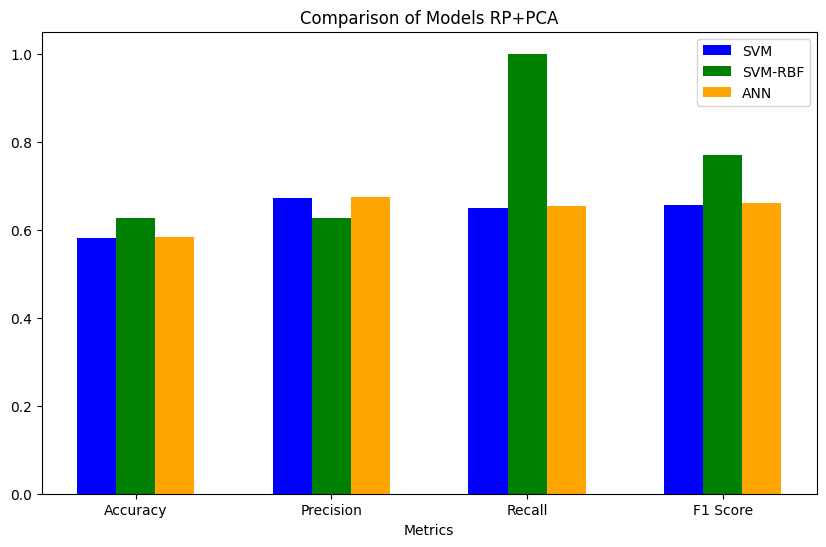

In [ ]:
labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
svm_scores = [avg_accuracy_svm, avg_precision_svm, avg_recall_svm, avg_f1_svm]
svm_rbf_scores = [avg_accuracy_svm_rbf, avg_precision_svm_rbf, avg_recall_svm_rbf, avg_f1_svm_rbf]
ann_scores = [avg_accuracy_ann, avg_precision_ann, avg_recall_ann, avg_f1_ann]

x = np.arange(len(labels))  # the label locations

width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width, svm_scores, width, label='SVM', color='blue')
rects2 = ax.bar(x, svm_rbf_scores, width, label='SVM-RBF', color='green')
rects3 = ax.bar(x + width, ann_scores, width, label='ANN', color='orange')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Metrics')
ax.set_title('Comparison of Models RP+PCA')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

# **SDAE**

In [ ]:
# Set parameters
dim = 500
n_splits = 5  # Number of folds for cross-validation

# Initialize lists to store metrics
avg_accuracies_svm = []
avg_precision_svm = []
avg_recall_svm = []
avg_f1_svm = []

avg_accuracies_svm_rbf = []
avg_precision_svm_rbf = []
avg_recall_svm_rbf = []
avg_f1_svm_rbf = []

avg_accuracies_ann = []
avg_precision_ann = []
avg_recall_ann = []
avg_f1_ann = []

# Define the feature set and labels
X = gse2034_normalized.iloc[:, 1:-1]  # Exclude the first column (Hybridization REF) and last (tumor label)
y = gse2034_normalized['tumor']

# Initialize StratifiedKFold
kf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Perform cross-validation
for train_index, test_index in kf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Apply SDAE with noise
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train.iloc[:, 1:-1])
    X_test_scaled = scaler.transform(X_test.iloc[:, 1:-1])

    sdae = Sequential()
    sdae.add(GaussianNoise(0.1, input_shape=(X_train_scaled.shape[1],)))  # Add Gaussian noise to input
    sdae.add(Dense(units=800, activation='relu'))
    sdae.add(GaussianNoise(0.1))
    sdae.add(Dense(units=400, activation='relu'))
    sdae.add(GaussianNoise(0.1))
    sdae.add(Dense(units=200, activation='relu'))
    sdae.add(GaussianNoise(0.1))
    sdae.add(Dense(units=100, activation='relu'))
    sdae.add(GaussianNoise(0.1))
    sdae.add(Dense(units=50, activation='relu'))
    sdae.add(GaussianNoise(0.1))
    sdae.add(Dense(units=25, activation='relu'))
    sdae.add(Dense(units=50, activation='relu'))
    sdae.add(Dense(units=100, activation='relu'))
    sdae.add(Dense(units=200, activation='relu'))
    sdae.add(Dense(units=400, activation='relu'))
    sdae.add(Dense(units=800, activation='relu'))
    sdae.add(Dense(units=X_train_scaled.shape[1], activation='linear'))

    sdae.compile(optimizer='adam', loss='mean_squared_error')

    sdae.fit(X_train_scaled, X_train_scaled, epochs=50, batch_size=32, shuffle=True, validation_data=(X_test_scaled, X_test_scaled), verbose=0)

    X_train_sdae = sdae.predict(X_train_scaled)
    X_test_sdae = sdae.predict(X_test_scaled)

    # Train and test SVM (linear kernel)
    svm = SVC(kernel='linear', C=1.0, gamma='auto')
    svm.fit(X_train_sdae, y_train)
    predictions_svm = svm.predict(X_test_sdae)
    accuracy_svm = accuracy_score(y_test, predictions_svm)
    precision_svm, recall_svm, f1_svm, _ = precision_recall_fscore_support(y_test, predictions_svm, average='binary', pos_label='yes')

    avg_accuracies_svm.append(accuracy_svm)
    avg_precision_svm.append(precision_svm)
    avg_recall_svm.append(recall_svm)
    avg_f1_svm.append(f1_svm)

    # Train and test SVM (RBF kernel)
    svm_rbf = SVC(kernel='rbf', C=1.0, gamma='auto')
    svm_rbf.fit(X_train_sdae, y_train)
    predictions_svm_rbf = svm_rbf.predict(X_test_sdae)
    accuracy_svm_rbf = accuracy_score(y_test, predictions_svm_rbf)
    precision_svm_rbf, recall_svm_rbf, f1_svm_rbf, _ = precision_recall_fscore_support(y_test, predictions_svm_rbf, average='binary', pos_label='yes')

    avg_accuracies_svm_rbf.append(accuracy_svm_rbf)
    avg_precision_svm_rbf.append(precision_svm_rbf)
    avg_recall_svm_rbf.append(recall_svm_rbf)
    avg_f1_svm_rbf.append(f1_svm_rbf)

    # Train and test ANN
    ann = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
    ann.fit(X_train_sdae, y_train)
    predictions_ann = ann.predict(X_test_sdae)
    accuracy_ann = accuracy_score(y_test, predictions_ann)
    precision_ann, recall_ann, f1_ann, _ = precision_recall_fscore_support(y_test, predictions_ann, average='binary', pos_label='yes')

    avg_accuracies_ann.append(accuracy_ann)
    avg_precision_ann.append(precision_ann)
    avg_recall_ann.append(recall_ann)
    avg_f1_ann.append(f1_ann)

# Calculate average scores
avg_accuracy_svm = np.mean(avg_accuracies_svm)
avg_precision_svm = np.mean(avg_precision_svm)
avg_recall_svm = np.mean(avg_recall_svm)
avg_f1_svm = np.mean(avg_f1_svm)

avg_accuracy_svm_rbf = np.mean(avg_accuracies_svm_rbf)
avg_precision_svm_rbf = np.mean(avg_precision_svm_rbf)
avg_recall_svm_rbf = np.mean(avg_recall_svm_rbf)
avg_f1_svm_rbf = np.mean(avg_f1_svm_rbf)

avg_accuracy_ann = np.mean(avg_accuracies_ann)
avg_precision_ann = np.mean(avg_precision_ann)
avg_recall_ann = np.mean(avg_recall_ann)
avg_f1_ann = np.mean(avg_f1_ann)

# Print results
print("SVM Results:")
print(f"Average Accuracy: {avg_accuracy_svm}")
print(f"Average Precision: {avg_precision_svm}")
print(f"Average Recall: {avg_recall_svm}")
print(f"Average F1 Score: {avg_f1_svm}")

print("\nSVM-RBF Results:")
print(f"Average Accuracy: {avg_accuracy_svm_rbf}")
print(f"Average Precision: {avg_precision_svm_rbf}")
print(f"Average Recall: {avg_recall_svm_rbf}")
print(f"Average F1 Score: {avg_f1_svm_rbf}")

print("\nANN Results:")
print(f"Average Accuracy: {avg_accuracy_ann}")
print(f"Average Precision: {avg_precision_ann}")
print(f"Average Recall: {avg_recall_ann}")
print(f"Average F1 Score: {avg_f1_ann}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/regularization/gaussian_noise.py:29: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/regularization/gaussian_noise.py:29: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/regularization/gaussian_noise.py:29: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/regularization/gaussian_noise.py:29: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/regularization/gaussian_noise.py:29: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
SVM Results:
Average Accuracy: 0.5211736237144585
Average Precision: 0.6082246816778267
Average Recall: 0.6533333333333333
Average F1 Score: 0.6295226876048794

SVM-RBF Results:
Average Accuracy: 0.611978221415608
Average Precision: 0.6241231707716315
Average Recall: 0.9553968253968254
Average F1 Score: 0.7547267063900375

ANN Results:
Average Accuracy: 0.520810647307925
Average Precision: 0.6116666666666666
Average Recall: 0.6484126984126984
Average F1 Score: 0.6279771549343212


In [ ]:
sdae_svm = avg_accuracy_svm
sdae_svmrbf = avg_accuracy_svm_rbf
sdae_ann = avg_accuracy_ann

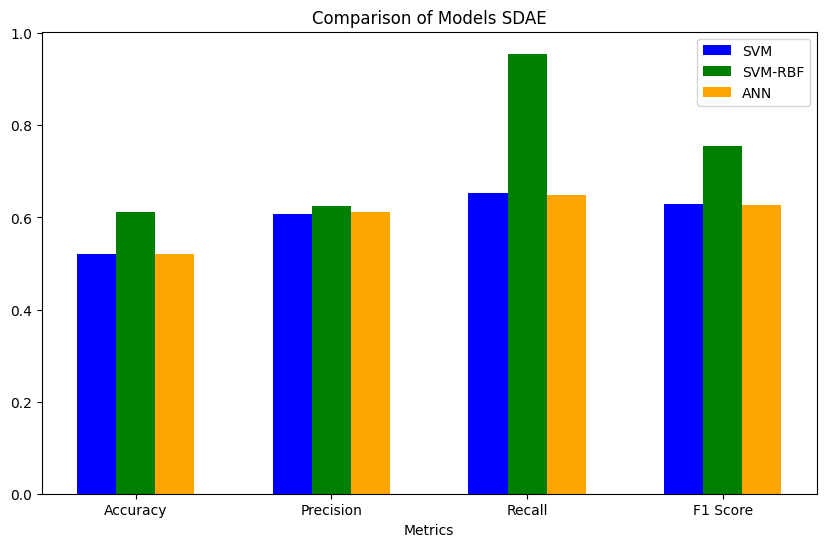

In [ ]:
labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
svm_scores = [avg_accuracy_svm, avg_precision_svm, avg_recall_svm, avg_f1_svm]
svm_rbf_scores = [avg_accuracy_svm_rbf, avg_precision_svm_rbf, avg_recall_svm_rbf, avg_f1_svm_rbf]
ann_scores = [avg_accuracy_ann, avg_precision_ann, avg_recall_ann, avg_f1_ann]

x = np.arange(len(labels))  # the label locations

width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width, svm_scores, width, label='SVM', color='blue')
rects2 = ax.bar(x, svm_rbf_scores, width, label='SVM-RBF', color='green')
rects3 = ax.bar(x + width, ann_scores, width, label='ANN', color='orange')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Metrics')
ax.set_title('Comparison of Models SDAE')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

# **RP+SDAE**

In [ ]:
# Define constants
dim = 500
iterations = 10

# Initialize dictionaries to store average metrics
avg_metrics = {
    'SVM': {'accuracy': [], 'precision': [], 'recall': [], 'f1': []},
    'SVM-RBF': {'accuracy': [], 'precision': [], 'recall': [], 'f1': []},
    'ANN': {'accuracy': [], 'precision': [], 'recall': [], 'f1': []}
}

def train_sdae(X_train_scaled, X_test_scaled):
    sdae = Sequential()
    sdae.add(GaussianNoise(0.1, input_shape=(X_train_scaled.shape[1],)))  # Add Gaussian noise
    # Define the SDAE architecture
    layers = [800, 400, 200, 100, 50, 25, 50, 100, 200, 400, 800]
    for units in layers:
        sdae.add(Dense(units=units, activation='relu'))
        sdae.add(GaussianNoise(0.1))
    sdae.add(Dense(units=X_train_scaled.shape[1], activation='linear'))

    sdae.compile(optimizer='adam', loss='mean_squared_error')
    sdae.fit(X_train_scaled, X_train_scaled, epochs=50, batch_size=32,
              shuffle=True, validation_data=(X_test_scaled, X_test_scaled), verbose=0)

    return sdae

def evaluate_model(model, X_train_sdae, y_train, X_test_sdae, y_test):
    model.fit(X_train_sdae, y_train)
    predictions = model.predict(X_test_sdae)
    accuracy = accuracy_score(y_test, predictions)
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, predictions, average='binary', pos_label='yes')
    return accuracy, precision, recall, f1

# Run the experiment for defined iterations
for iteration in range(iterations):
    sss = StratifiedShuffleSplit(n_splits=1, test_size=250, random_state=iteration)
    for train_index, test_index in sss.split(gse2034_normalized.iloc[:, 1:-1], gse2034_normalized['tumor']):
        X_train = gse2034_normalized.iloc[train_index]
        X_test = gse2034_normalized.iloc[test_index]

    # Apply Random Projection (RP)
    n_components_rp = min(dim, X_train.shape[0], X_train.shape[1])
    rp = SparseRandomProjection(n_components=n_components_rp, random_state=iteration)
    X_train_rp = rp.fit_transform(X_train.iloc[:, 1:-1])
    X_test_rp = rp.transform(X_test.iloc[:, 1:-1])

    # Apply Standard Scaler
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_rp)
    X_test_scaled = scaler.transform(X_test_rp)

    # Train SDAE
    sdae = train_sdae(X_train_scaled, X_test_scaled)
    X_train_sdae = sdae.predict(X_train_scaled)
    X_test_sdae = sdae.predict(X_test_scaled)

    # Train and evaluate SVM
    svm = SVC(kernel='linear', C=1.0, gamma='auto')
    metrics_svm = evaluate_model(svm, X_train_sdae, X_train['tumor'], X_test_sdae, X_test['tumor'])
    avg_metrics['SVM']['accuracy'].append(metrics_svm[0])
    avg_metrics['SVM']['precision'].append(metrics_svm[1])
    avg_metrics['SVM']['recall'].append(metrics_svm[2])
    avg_metrics['SVM']['f1'].append(metrics_svm[3])

    # Train and evaluate SVM-RBF
    svm_rbf = SVC(kernel='rbf', C=1.0, gamma='auto')
    metrics_svm_rbf = evaluate_model(svm_rbf, X_train_sdae, X_train['tumor'], X_test_sdae, X_test['tumor'])
    avg_metrics['SVM-RBF']['accuracy'].append(metrics_svm_rbf[0])
    avg_metrics['SVM-RBF']['precision'].append(metrics_svm_rbf[1])
    avg_metrics['SVM-RBF']['recall'].append(metrics_svm_rbf[2])
    avg_metrics['SVM-RBF']['f1'].append(metrics_svm_rbf[3])

    # Train and evaluate ANN
    ann = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=iteration)
    metrics_ann = evaluate_model(ann, X_train_sdae, X_train['tumor'], X_test_sdae, X_test['tumor'])
    avg_metrics['ANN']['accuracy'].append(metrics_ann[0])
    avg_metrics['ANN']['precision'].append(metrics_ann[1])
    avg_metrics['ANN']['recall'].append(metrics_ann[2])
    avg_metrics['ANN']['f1'].append(metrics_ann[3])

# Calculate and print average scores
for model in avg_metrics:
    print(f"\n{model} Results:")
    print(f"Average Accuracy: {np.mean(avg_metrics[model]['accuracy'])}")
    print(f"Average Precision: {np.mean(avg_metrics[model]['precision'])}")
    print(f"Average Recall: {np.mean(avg_metrics[model]['recall'])}")
    print(f"Average F1 Score: {np.mean(avg_metrics[model]['f1'])}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/regularization/gaussian_noise.py:29: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/regularization/gaussian_noise.py:29: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/regularization/gaussian_noise.py:29: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/regularization/gaussian_noise.py:29: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/regularization/gaussian_noise.py:29: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/regularization/gaussian_noise.py:29: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/regularization/gaussian_noise.py:29: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/regularization/gaussian_noise.py:29: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/regularization/gaussian_noise.py:29: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/regularization/gaussian_noise.py:29: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 

SVM Results:
Average Accuracy: 0.6068
Average Precision: 0.6336251018927989
Average Recall: 0.8788461538461538
Average F1 Score: 0.7335881692994023

SVM-RBF Results:
Average Accuracy: 0.6239999999999999
Average Precision: 0.6259469624107566
Average Recall: 0.9878205128205128
Average F1 Score: 0.766267425867502

ANN Results:
Average Accuracy: 0.5416000000000001
Average Precision: 0.6403847055722085
Average Recall: 0.6192307692307691
Average F1 Score: 0.6206782715056891


In [ ]:
rpsdae_svm = avg_accuracy_svm
rpsdae_svmrbf = avg_accuracy_svm_rbf
rpsdae_ann = avg_accuracy_ann

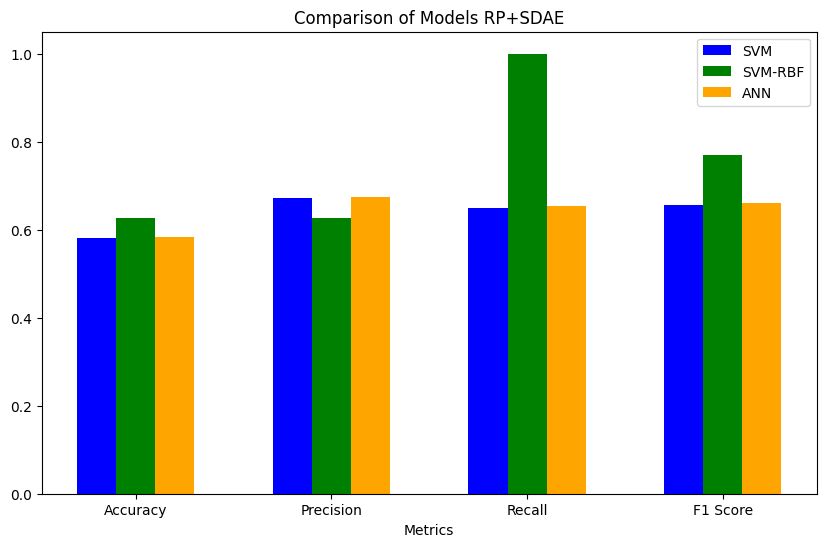

In [ ]:
labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
svm_scores = [avg_accuracy_svm, avg_precision_svm, avg_recall_svm, avg_f1_svm]
svm_rbf_scores = [avg_accuracy_svm_rbf, avg_precision_svm_rbf, avg_recall_svm_rbf, avg_f1_svm_rbf]
ann_scores = [avg_accuracy_ann, avg_precision_ann, avg_recall_ann, avg_f1_ann]

x = np.arange(len(labels))  # the label locations

width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width, svm_scores, width, label='SVM', color='blue')
rects2 = ax.bar(x, svm_rbf_scores, width, label='SVM-RBF', color='green')
rects3 = ax.bar(x + width, ann_scores, width, label='ANN', color='orange')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Metrics')
ax.set_title('Comparison of Models RP+SDAE')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

# **FS+SDAE**

In [ ]:
dim = 1000

# Initialize metrics
avg_accuracies_svm = []
avg_precision_svm = []
avg_recall_svm = []
avg_f1_svm = []

avg_accuracies_svm_rbf = []
avg_precision_svm_rbf = []
avg_recall_svm_rbf = []
avg_f1_svm_rbf = []

avg_accuracies_ann = []
avg_precision_ann = []
avg_recall_ann = []
avg_f1_ann = []

# Stratified K-Folds cross-validator
skf = StratifiedKFold(n_splits=10)

# Prepare the input data from GSE2034 dataset
X = gse2034.iloc[:, 1:-1]  # Features
y = gse2034['tumor']       # Labels

# Min-Max Scaling and Feature Selection
scaler = MinMaxScaler()
feature_selector = SelectKBest(chi2, k=dim)

# Cross-validation for each model
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Scaling the data
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Feature Selection
    X_train_fs = feature_selector.fit_transform(X_train_scaled, y_train)
    X_test_fs = feature_selector.transform(X_test_scaled)

    # Train SDAE
    sdae = Sequential()
    sdae.add(GaussianNoise(0.1, input_shape=(X_train_fs.shape[1],)))  # Add Gaussian noise to input
    sdae.add(Dense(units=800, activation='relu'))
    sdae.add(GaussianNoise(0.1))
    sdae.add(Dense(units=400, activation='relu'))
    sdae.add(GaussianNoise(0.1))
    sdae.add(Dense(units=200, activation='relu'))
    sdae.add(GaussianNoise(0.1))
    sdae.add(Dense(units=100, activation='relu'))
    sdae.add(GaussianNoise(0.1))
    sdae.add(Dense(units=50, activation='relu'))
    sdae.add(GaussianNoise(0.1))
    sdae.add(Dense(units=25, activation='relu'))
    sdae.add(Dense(units=50, activation='relu'))
    sdae.add(Dense(units=100, activation='relu'))
    sdae.add(Dense(units=200, activation='relu'))
    sdae.add(Dense(units=400, activation='relu'))
    sdae.add(Dense(units=800, activation='relu'))
    sdae.add(Dense(units=X_train_fs.shape[1], activation='linear'))

    sdae.compile(optimizer='adam', loss='mean_squared_error')
    sdae.fit(X_train_fs, X_train_fs, epochs=50, batch_size=32, shuffle=True, verbose=0)

    # Get encoded data
    X_train_sdae = sdae.predict(X_train_fs)
    X_test_sdae = sdae.predict(X_test_fs)

    # Train and test SVM
    svm = SVC(kernel='linear', C=1.0, gamma='auto')
    predictions_svm = svm.fit(X_train_sdae, y_train).predict(X_test_sdae)
    accuracy_svm = accuracy_score(y_test, predictions_svm)
    precision_svm, recall_svm, f1_svm, _ = precision_recall_fscore_support(y_test, predictions_svm, average='binary', pos_label='yes')

    avg_accuracies_svm.append(accuracy_svm)
    avg_precision_svm.append(precision_svm)
    avg_recall_svm.append(recall_svm)
    avg_f1_svm.append(f1_svm)

    # Train and test SVM-RBF
    svm_rbf = SVC(kernel='rbf', C=1.0, gamma='auto')
    predictions_svm_rbf = svm_rbf.fit(X_train_sdae, y_train).predict(X_test_sdae)
    accuracy_svm_rbf = accuracy_score(y_test, predictions_svm_rbf)
    precision_svm_rbf, recall_svm_rbf, f1_svm_rbf, _ = precision_recall_fscore_support(y_test, predictions_svm_rbf, average='binary', pos_label='yes')

    avg_accuracies_svm_rbf.append(accuracy_svm_rbf)
    avg_precision_svm_rbf.append(precision_svm_rbf)
    avg_recall_svm_rbf.append(recall_svm_rbf)
    avg_f1_svm_rbf.append(f1_svm_rbf)

    # Train and test ANN
    ann = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000)
    predictions_ann = ann.fit(X_train_sdae, y_train).predict(X_test_sdae)
    accuracy_ann = accuracy_score(y_test, predictions_ann)
    precision_ann, recall_ann, f1_ann, _ = precision_recall_fscore_support(y_test, predictions_ann, average='binary', pos_label='yes')

    avg_accuracies_ann.append(accuracy_ann)
    avg_precision_ann.append(precision_ann)
    avg_recall_ann.append(recall_ann)
    avg_f1_ann.append(f1_ann)

# Calculate average scores
avg_accuracy_svm = np.mean(avg_accuracies_svm)
avg_precision_svm = np.mean(avg_precision_svm)
avg_recall_svm = np.mean(avg_recall_svm)
avg_f1_svm = np.mean(avg_f1_svm)

avg_accuracy_svm_rbf = np.mean(avg_accuracies_svm_rbf)
avg_precision_svm_rbf = np.mean(avg_precision_svm_rbf)
avg_recall_svm_rbf = np.mean(avg_recall_svm_rbf)
avg_f1_svm_rbf = np.mean(avg_f1_svm_rbf)

avg_accuracy_ann = np.mean(avg_accuracies_ann)
avg_precision_ann = np.mean(avg_precision_ann)
avg_recall_ann = np.mean(avg_recall_ann)
avg_f1_ann = np.mean(avg_f1_ann)

# Print results
print("SVM Results:")
print(f"Average Accuracy: {avg_accuracy_svm}")
print(f"Average Precision: {avg_precision_svm}")
print(f"Average Recall: {avg_recall_svm}")
print(f"Average F1 Score: {avg_f1_svm}")

print("\nSVM-RBF Results:")
print(f"Average Accuracy: {avg_accuracy_svm_rbf}")
print(f"Average Precision: {avg_precision_svm_rbf}")
print(f"Average Recall: {avg_recall_svm_rbf}")
print(f"Average F1 Score: {avg_f1_svm_rbf}")

print("\nANN Results:")
print(f"Average Accuracy: {avg_accuracy_ann}")
print(f"Average Precision: {avg_precision_ann}")
print(f"Average Recall: {avg_recall_ann}")
print(f"Average F1 Score: {avg_f1_ann}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/regularization/gaussian_noise.py:29: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/regularization/gaussian_noise.py:29: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/regularization/gaussian_noise.py:29: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/regularization/gaussian_noise.py:29: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/regularization/gaussian_noise.py:29: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/regularization/gaussian_noise.py:29: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/regularization/gaussian_noise.py:29: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/regularization/gaussian_noise.py:29: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/regularization/gaussian_noise.py:29: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/regularization/gaussian_noise.py:29: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
SVM Results:
Average Accuracy: 0.6222906403940887
Average Precision: 0.6584433192760344
Average Recall: 0.8375816993464053
Average F1 Score: 0.7337622133635749

SVM-RBF Results:
Average Accuracy: 0.6259852216748769
Average Precision: 0.6259852216748769
Average Recall: 1.0
Average F1 Score: 0.769912632336314

ANN Results:
Average Accuracy: 0.6365763546798029
Average Precision: 0.6729732466805076
Average Recall: 0.8316993464052288
Average F1 Score: 0.7388583649373734


In [ ]:
fssdae_svm = avg_accuracy_svm
fssdae_svmrbf = avg_accuracy_svm_rbf
fssdae_ann = avg_accuracy_ann

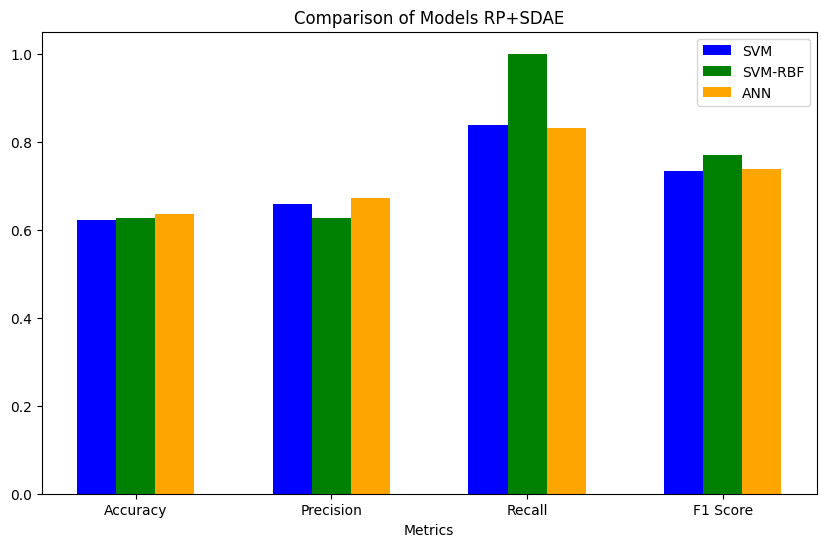

In [ ]:
labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
svm_scores = [avg_accuracy_svm, avg_precision_svm, avg_recall_svm, avg_f1_svm]
svm_rbf_scores = [avg_accuracy_svm_rbf, avg_precision_svm_rbf, avg_recall_svm_rbf, avg_f1_svm_rbf]
ann_scores = [avg_accuracy_ann, avg_precision_ann, avg_recall_ann, avg_f1_ann]

x = np.arange(len(labels))  # the label locations

width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width, svm_scores, width, label='SVM', color='blue')
rects2 = ax.bar(x, svm_rbf_scores, width, label='SVM-RBF', color='green')
rects3 = ax.bar(x + width, ann_scores, width, label='ANN', color='orange')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Metrics')
ax.set_title('Comparison of Models RP+SDAE')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

In [ ]:
from tabulate import tabulate

# Convert accuracies to percentage
def format_percentage(accuracy):
    return f'{accuracy * 100:.2f}%'

# Define the accuracies and models
data = [
    ['PCA', format_percentage(pca_svm), format_percentage(pca_svmrbf), format_percentage(pca_ann)],
    ['KPCA', format_percentage(kpca_svm), format_percentage(kpca_svmrbf), format_percentage(kpca_ann)],
    ['RP+PCA', format_percentage(rppca_svm), format_percentage(rppca_svmrbf), format_percentage(rppca_ann)],
    ['SDAE', format_percentage(sdae_svm), format_percentage(sdae_svmrbf), format_percentage(sdae_ann)],
    ['RP+SDAE', format_percentage(rpsdae_svm), format_percentage(rpsdae_svmrbf), format_percentage(rpsdae_ann)],
    ['FS+SDAE', format_percentage(fssdae_svm), format_percentage(fssdae_svmrbf), format_percentage(fssdae_ann)]
]

headers = ['Model', 'SVM', 'SVM-RBF', 'ANN']

# Print the table
print(tabulate(data, headers=headers, tablefmt='grid'))


+---------+--------+-----------+--------+
| Model   | SVM    | SVM-RBF   | ANN    |
+=========+========+===========+========+
| PCA     | 71.33% | 63.28%    | 65.73% |
+---------+--------+-----------+--------+
| KPCA    | 64.33% | 62.59%    | 64.69% |
+---------+--------+-----------+--------+
| RP+PCA  | 58.03% | 62.59%    | 58.38% |
+---------+--------+-----------+--------+
| SDAE    | 52.12% | 61.20%    | 52.08% |
+---------+--------+-----------+--------+
| RP+SDAE | 58.03% | 62.59%    | 58.38% |
+---------+--------+-----------+--------+
| FS+SDAE | 62.23% | 62.60%    | 63.66% |
+---------+--------+-----------+--------+


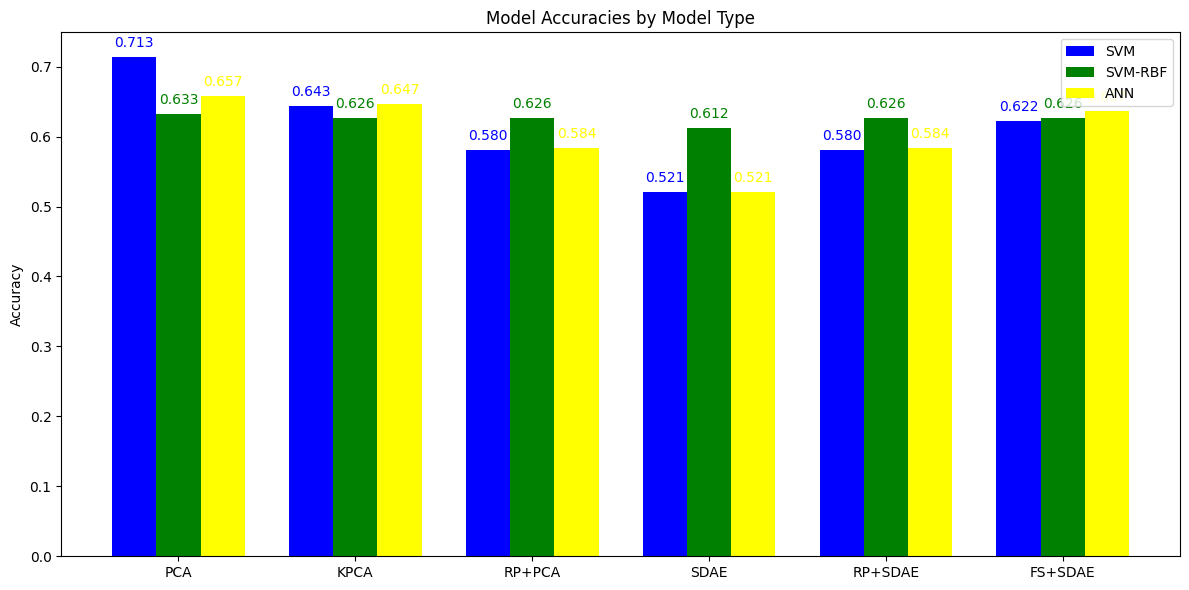

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the variables with accuracies
accuracies_svm = [pca_svm, kpca_svm, rppca_svm, sdae_svm, rpsdae_svm, fssdae_svm]
accuracies_svm_rbf = [pca_svmrbf, kpca_svmrbf, rppca_svmrbf, sdae_svmrbf, rpsdae_svmrbf, fssdae_svmrbf]
accuracies_ann = [pca_ann, kpca_ann, rppca_ann, sdae_ann, rpsdae_ann, fssdae_ann]

# Define the corresponding model names
models = ['PCA', 'KPCA', 'RP+PCA', 'SDAE', 'RP+SDAE', 'FS+SDAE']

# Create a bar plot with different colors for SVM, SVM-RBF, and ANN
bar_width = 0.25
index = np.arange(len(models))

plt.figure(figsize=(12, 6))

plt.bar(index - bar_width, accuracies_svm, bar_width, label='SVM', color='blue')
plt.bar(index, accuracies_svm_rbf, bar_width, label='SVM-RBF', color='green')
plt.bar(index + bar_width, accuracies_ann, bar_width, label='ANN', color='yellow')

plt.xticks(index, models)
plt.ylabel('Accuracy')
plt.title('Model Accuracies by Model Type')

# Add accuracy values on top of the bars
for i, value in enumerate(accuracies_svm):
    plt.text(i - bar_width, value + 0.01, f'{value:.3f}', ha='center', va='bottom', color='blue')

for i, value in enumerate(accuracies_svm_rbf):
    plt.text(i, value + 0.01, f'{value:.3f}', ha='center', va='bottom', color='green')

for i, value in enumerate(accuracies_ann):
    plt.text(i + bar_width, value + 0.01, f'{value:.3f}', ha='center', va='bottom', color='yellow')

plt.legend()
plt.tight_layout()

# Show the plot
plt.show()


# **GSE25066**

## **Replacing NAN values & Precessing by Z scores**

In [ ]:
# Drop unnecessary columns
gse25066_data = gse25066.drop(columns=['Hybridization REF', 'tumor'])

# Separate the data into tumor and non-tumor groups
tumor_data = gse25066_data[gse25066['tumor'] == 'yes']
normal_data = gse25066_data[gse25066['tumor'] == 'no']

# Calculate mean values for each group
tumor_mean = tumor_data.mean()
normal_mean = normal_data.mean()

# Fill missing values with mean values
gse25066_data_tumor_filled = tumor_data.fillna(tumor_mean)
gse25066_data_normal_filled = normal_data.fillna(normal_mean)

# Concatenate the filled data back together
gse25066_data_filled = pd.concat([gse25066_data_tumor_filled, gse25066_data_normal_filled])

# Get the 'Hybridization REF' column
hybridization_ref = gse25066['Hybridization REF']

# Add 'Hybridization REF' and 'tumor' columns back
gse25066_data_filled = pd.concat([hybridization_ref, gse25066_data_filled, gse25066['tumor']], axis=1)

# Save the preprocessed data
gse25066_data_filled.to_csv('Preprocessed_GSE25066_Filled.csv', index=False)

# Apply Z-score normalization
data_values = gse25066_data_filled.iloc[:, 1:-1].values
scaler = StandardScaler()
normalized_data = scaler.fit_transform(data_values)

# Create a DataFrame with the normalized values
gse25066_normalized = pd.DataFrame(data=normalized_data, columns=gse25066_data_filled.columns[1:-1])

# Add 'Hybridization REF' and 'tumor' columns back
gse25066_normalized = pd.concat([hybridization_ref, gse25066_normalized, gse25066['tumor']], axis=1)

# Save the preprocessed data
gse25066_normalized.to_csv('Preprocessed_GSE25066_Normalized.csv', index=False)


# **PCA**

In [ ]:
# Initialize lists to store metrics
accuracies_svm = []
precisions_svm = []
recalls_svm = []
f1_scores_svm = []

accuracies_svm_rbf = []
precisions_svm_rbf = []
recalls_svm_rbf = []
f1_scores_svm_rbf = []

accuracies_ann = []
precisions_ann = []
recalls_ann = []
f1_scores_ann = []

# Define the number of folds
kf = StratifiedKFold(n_splits=5)  # 5-fold cross-validation

# Define the feature set and labels for GSE25066
X = gse25066_normalized.iloc[:, 1:-1]  # Exclude the first column (Hybridization REF) and last (tumor label)
y = gse25066_normalized['tumor']

# Perform cross-validation
for train_index, test_index in kf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train and evaluate SVM (linear kernel)
    svm = SVC(kernel='linear', C=1.0, gamma='auto')
    svm.fit(X_train, y_train)
    predictions_svm = svm.predict(X_test)
    accuracy_svm = accuracy_score(y_test, predictions_svm)
    precision_svm, recall_svm, f1_svm, _ = precision_recall_fscore_support(y_test, predictions_svm, average='binary', pos_label='yes')

    accuracies_svm.append(accuracy_svm)
    precisions_svm.append(precision_svm)
    recalls_svm.append(recall_svm)
    f1_scores_svm.append(f1_svm)

    # Train and evaluate SVM (RBF kernel)
    svm_rbf = SVC(kernel='rbf', C=1.0, gamma='auto')
    svm_rbf.fit(X_train, y_train)
    predictions_svm_rbf = svm_rbf.predict(X_test)
    accuracy_svm_rbf = accuracy_score(y_test, predictions_svm_rbf)
    precision_svm_rbf, recall_svm_rbf, f1_svm_rbf, _ = precision_recall_fscore_support(y_test, predictions_svm_rbf, average='binary', pos_label='yes')

    accuracies_svm_rbf.append(accuracy_svm_rbf)
    precisions_svm_rbf.append(precision_svm_rbf)
    recalls_svm_rbf.append(recall_svm_rbf)
    f1_scores_svm_rbf.append(f1_svm_rbf)

    # Train and evaluate ANN
    ann = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
    ann.fit(X_train, y_train)
    predictions_ann = ann.predict(X_test)
    accuracy_ann = accuracy_score(y_test, predictions_ann)
    precision_ann, recall_ann, f1_ann, _ = precision_recall_fscore_support(y_test, predictions_ann, average='binary', pos_label='yes')

    accuracies_ann.append(accuracy_ann)
    precisions_ann.append(precision_ann)
    recalls_ann.append(recall_ann)
    f1_scores_ann.append(f1_ann)

# Calculate average scores across all folds
avg_accuracy_svm = np.mean(accuracies_svm)
avg_precision_svm = np.mean(precisions_svm)
avg_recall_svm = np.mean(recalls_svm)
avg_f1_svm = np.mean(f1_scores_svm)

avg_accuracy_svm_rbf = np.mean(accuracies_svm_rbf)
avg_precision_svm_rbf = np.mean(precisions_svm_rbf)
avg_recall_svm_rbf = np.mean(recalls_svm_rbf)
avg_f1_svm_rbf = np.mean(f1_scores_svm_rbf)

avg_accuracy_ann = np.mean(accuracies_ann)
avg_precision_ann = np.mean(precisions_ann)
avg_recall_ann = np.mean(recalls_ann)
avg_f1_ann = np.mean(f1_scores_ann)

# Print results
print("SVM Results (Linear Kernel):")
print(f"Average Accuracy: {avg_accuracy_svm}")
print(f"Average Precision: {avg_precision_svm}")
print(f"Average Recall: {avg_recall_svm}")
print(f"Average F1 Score: {avg_f1_svm}")

print("\nSVM-RBF Results:")
print(f"Average Accuracy: {avg_accuracy_svm_rbf}")
print(f"Average Precision: {avg_precision_svm_rbf}")
print(f"Average Recall: {avg_recall_svm_rbf}")
print(f"Average F1 Score: {avg_f1_svm_rbf}")

print("\nANN Results:")
print(f"Average Accuracy: {avg_accuracy_ann}")
print(f"Average Precision: {avg_precision_ann}")
print(f"Average Recall: {avg_recall_ann}")
print(f"Average F1 Score: {avg_f1_ann}")


SVM Results (Linear Kernel):
Average Accuracy: 0.8149866007008864
Average Precision: 0.8481403110069252
Average Recall: 0.9360597208698473
Average F1 Score: 0.8894718628953339

SVM-RBF Results:
Average Accuracy: 0.7947021232735519
Average Precision: 0.7963221527286329
Average Recall: 0.9974358974358974
Average F1 Score: 0.8856016343207355

ANN Results:
Average Accuracy: 0.7722737579880438
Average Precision: 0.8588536585928154
Average Recall: 0.854397922752353
Average F1 Score: 0.8555209196739064


In [ ]:
pca_svm = avg_accuracy_svm
pca_svmrbf = avg_accuracy_svm_rbf
pca_ann = avg_accuracy_ann

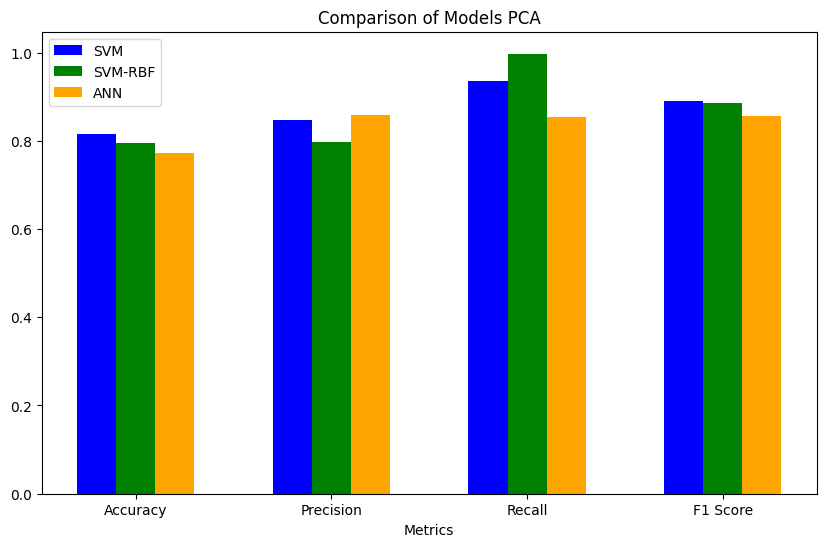

In [ ]:
labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
svm_scores = [avg_accuracy_svm, avg_precision_svm, avg_recall_svm, avg_f1_svm]
svm_rbf_scores = [avg_accuracy_svm_rbf, avg_precision_svm_rbf, avg_recall_svm_rbf, avg_f1_svm_rbf]
ann_scores = [avg_accuracy_ann, avg_precision_ann, avg_recall_ann, avg_f1_ann]

x = np.arange(len(labels))  # the label locations

width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width, svm_scores, width, label='SVM', color='blue')
rects2 = ax.bar(x, svm_rbf_scores, width, label='SVM-RBF', color='green')
rects3 = ax.bar(x + width, ann_scores, width, label='ANN', color='orange')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Metrics')
ax.set_title('Comparison of Models PCA')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

# **KPCA**

In [ ]:
# Initialize lists to store metrics
accuracies_svm = []
precisions_svm = []
recalls_svm = []
f1_scores_svm = []

accuracies_svm_rbf = []
precisions_svm_rbf = []
recalls_svm_rbf = []
f1_scores_svm_rbf = []

accuracies_ann = []
precisions_ann = []
recalls_ann = []
f1_scores_ann = []

# Set PCA dimension
dim = 500

# Define the number of folds
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)  # 5-fold cross-validation

# Define the feature set and labels for GSE25066
X = gse25066_normalized.iloc[:, 1:-1]  # Exclude the first column (Hybridization REF) and last (tumor label)
y = gse25066_normalized['tumor']

# Perform cross-validation
for train_index, test_index in kf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Apply Kernel PCA
    kpca = KernelPCA(n_components=min(dim, X_train.shape[0], X_train.shape[1]), kernel='rbf')
    X_train_kpca = kpca.fit_transform(X_train)
    X_test_kpca = kpca.transform(X_test)

    # Train and evaluate SVM (linear kernel)
    svm = SVC(kernel='linear', C=1.0, gamma='auto')
    svm.fit(X_train_kpca, y_train)
    predictions_svm = svm.predict(X_test_kpca)
    accuracy_svm = accuracy_score(y_test, predictions_svm)
    precision_svm, recall_svm, f1_svm, _ = precision_recall_fscore_support(y_test, predictions_svm, average='binary', pos_label='yes')

    accuracies_svm.append(accuracy_svm)
    precisions_svm.append(precision_svm)
    recalls_svm.append(recall_svm)
    f1_scores_svm.append(f1_svm)

    # Train and evaluate SVM (RBF kernel)
    svm_rbf = SVC(kernel='rbf', C=1.0, gamma='auto')
    svm_rbf.fit(X_train_kpca, y_train)
    predictions_svm_rbf = svm_rbf.predict(X_test_kpca)
    accuracy_svm_rbf = accuracy_score(y_test, predictions_svm_rbf)
    precision_svm_rbf, recall_svm_rbf, f1_svm_rbf, _ = precision_recall_fscore_support(y_test, predictions_svm_rbf, average='binary', pos_label='yes')

    accuracies_svm_rbf.append(accuracy_svm_rbf)
    precisions_svm_rbf.append(precision_svm_rbf)
    recalls_svm_rbf.append(recall_svm_rbf)
    f1_scores_svm_rbf.append(f1_svm_rbf)

    # Train and evaluate ANN
    ann = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
    ann.fit(X_train_kpca, y_train)
    predictions_ann = ann.predict(X_test_kpca)
    accuracy_ann = accuracy_score(y_test, predictions_ann)
    precision_ann, recall_ann, f1_ann, _ = precision_recall_fscore_support(y_test, predictions_ann, average='binary', pos_label='yes')

    accuracies_ann.append(accuracy_ann)
    precisions_ann.append(precision_ann)
    recalls_ann.append(recall_ann)
    f1_scores_ann.append(f1_ann)

# Calculate average scores across all folds
avg_accuracy_svm = np.mean(accuracies_svm)
avg_precision_svm = np.mean(precisions_svm)
avg_recall_svm = np.mean(recalls_svm)
avg_f1_svm = np.mean(f1_scores_svm)

avg_accuracy_svm_rbf = np.mean(accuracies_svm_rbf)
avg_precision_svm_rbf = np.mean(precisions_svm_rbf)
avg_recall_svm_rbf = np.mean(recalls_svm_rbf)
avg_f1_svm_rbf = np.mean(f1_scores_svm_rbf)

avg_accuracy_ann = np.mean(accuracies_ann)
avg_precision_ann = np.mean(precisions_ann)
avg_recall_ann = np.mean(recalls_ann)
avg_f1_ann = np.mean(f1_scores_ann)

# Print results
print("SVM Results (Linear Kernel):")
print(f"Average Accuracy: {avg_accuracy_svm}")
print(f"Average Precision: {avg_precision_svm}")
print(f"Average Recall: {avg_recall_svm}")
print(f"Average F1 Score: {avg_f1_svm}")

print("\nSVM-RBF Results:")
print(f"Average Accuracy: {avg_accuracy_svm_rbf}")
print(f"Average Precision: {avg_precision_svm_rbf}")
print(f"Average Recall: {avg_recall_svm_rbf}")
print(f"Average F1 Score: {avg_f1_svm_rbf}")

print("\nANN Results:")
print(f"Average Accuracy: {avg_accuracy_ann}")
print(f"Average Precision: {avg_precision_ann}")
print(f"Average Recall: {avg_recall_ann}")
print(f"Average F1 Score: {avg_f1_ann}")


SVM Results (Linear Kernel):
Average Accuracy: 0.7947021232735519
Average Precision: 0.7963221527286329
Average Recall: 0.9974358974358974
Average F1 Score: 0.8856016343207355

SVM-RBF Results:
Average Accuracy: 0.7967429396000826
Average Precision: 0.7967429396000826
Average Recall: 1.0
Average F1 Score: 0.8868743615934627

ANN Results:
Average Accuracy: 0.8069057926200784
Average Precision: 0.8101790267154417
Average Recall: 0.9898085037325544
Average F1 Score: 0.8909741019214703


In [ ]:
kpca_svm = avg_accuracy_svm
kpca_svmrbf = avg_accuracy_svm_rbf
kpca_ann = avg_accuracy_ann

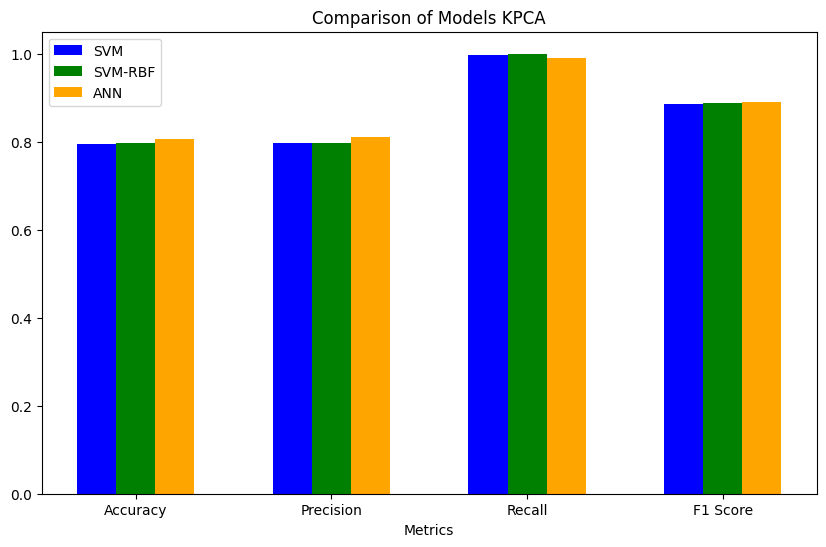

In [ ]:
labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
svm_scores = [avg_accuracy_svm, avg_precision_svm, avg_recall_svm, avg_f1_svm]
svm_rbf_scores = [avg_accuracy_svm_rbf, avg_precision_svm_rbf, avg_recall_svm_rbf, avg_f1_svm_rbf]
ann_scores = [avg_accuracy_ann, avg_precision_ann, avg_recall_ann, avg_f1_ann]

x = np.arange(len(labels))  # the label locations

width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width, svm_scores, width, label='SVM', color='blue')
rects2 = ax.bar(x, svm_rbf_scores, width, label='SVM-RBF', color='green')
rects3 = ax.bar(x + width, ann_scores, width, label='ANN', color='orange')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Metrics')
ax.set_title('Comparison of Models KPCA')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

# **RP+PCA**

In [ ]:
# Set parameters
dim = 500
n_splits = 5  # Number of folds for cross-validation

# Initialize lists to store metrics
avg_accuracies_svm = []
avg_precision_svm = []
avg_recall_svm = []
avg_f1_svm = []

avg_accuracies_svm_rbf = []
avg_precision_svm_rbf = []
avg_recall_svm_rbf = []
avg_f1_svm_rbf = []

avg_accuracies_ann = []
avg_precision_ann = []
avg_recall_ann = []
avg_f1_ann = []

# Define the feature set and labels for GSE25066
X = gse25066_normalized.iloc[:, 1:-1]  # Exclude the first column (Hybridization REF) and last (tumor label)
y = gse25066_normalized['tumor']

# Initialize StratifiedKFold
kf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Perform cross-validation
for train_index, test_index in kf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Adjust the number of components for Sparse Random Projection
    n_components_rp = min(dim, X_train.shape[0], X_train.shape[1])
    rp = SparseRandomProjection(n_components=n_components_rp, random_state=42)
    X_train_rp = rp.fit_transform(X_train)
    X_test_rp = rp.transform(X_test)

    # Apply PCA
    pca = PCA(n_components=min(dim, X_train_rp.shape[1]))
    X_train_pca = pca.fit_transform(X_train_rp)
    X_test_pca = pca.transform(X_test_rp)

    # Train and test SVM (linear kernel)
    svm = SVC(kernel='linear', C=1.0, gamma='auto')
    svm.fit(X_train_pca, y_train)
    predictions_svm = svm.predict(X_test_pca)
    accuracy_svm = accuracy_score(y_test, predictions_svm)
    precision_svm, recall_svm, f1_svm, _ = precision_recall_fscore_support(y_test, predictions_svm, average='binary', pos_label='yes')

    avg_accuracies_svm.append(accuracy_svm)
    avg_precision_svm.append(precision_svm)
    avg_recall_svm.append(recall_svm)
    avg_f1_svm.append(f1_svm)

    # Train and test SVM (RBF kernel)
    svm_rbf = SVC(kernel='rbf', C=1.0, gamma='auto')
    svm_rbf.fit(X_train_pca, y_train)
    predictions_svm_rbf = svm_rbf.predict(X_test_pca)
    accuracy_svm_rbf = accuracy_score(y_test, predictions_svm_rbf)
    precision_svm_rbf, recall_svm_rbf, f1_svm_rbf, _ = precision_recall_fscore_support(y_test, predictions_svm_rbf, average='binary', pos_label='yes')

    avg_accuracies_svm_rbf.append(accuracy_svm_rbf)
    avg_precision_svm_rbf.append(precision_svm_rbf)
    avg_recall_svm_rbf.append(recall_svm_rbf)
    avg_f1_svm_rbf.append(f1_svm_rbf)

    # Train and test ANN
    ann = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
    ann.fit(X_train_pca, y_train)
    predictions_ann = ann.predict(X_test_pca)
    accuracy_ann = accuracy_score(y_test, predictions_ann)
    precision_ann, recall_ann, f1_ann, _ = precision_recall_fscore_support(y_test, predictions_ann, average='binary', pos_label='yes')

    avg_accuracies_ann.append(accuracy_ann)
    avg_precision_ann.append(precision_ann)
    avg_recall_ann.append(recall_ann)
    avg_f1_ann.append(f1_ann)

# Calculate average scores
avg_accuracy_svm = np.mean(avg_accuracies_svm)
avg_precision_svm = np.mean(avg_precision_svm)
avg_recall_svm = np.mean(avg_recall_svm)
avg_f1_svm = np.mean(avg_f1_svm)

avg_accuracy_svm_rbf = np.mean(avg_accuracies_svm_rbf)
avg_precision_svm_rbf = np.mean(avg_precision_svm_rbf)
avg_recall_svm_rbf = np.mean(avg_recall_svm_rbf)
avg_f1_svm_rbf = np.mean(avg_f1_svm_rbf)

avg_accuracy_ann = np.mean(avg_accuracies_ann)
avg_precision_ann = np.mean(avg_precision_ann)
avg_recall_ann = np.mean(avg_recall_ann)
avg_f1_ann = np.mean(avg_f1_ann)

# Print results
print("SVM Results (Linear Kernel):")
print(f"Average Accuracy: {avg_accuracy_svm}")
print(f"Average Precision: {avg_precision_svm}")
print(f"Average Recall: {avg_recall_svm}")
print(f"Average F1 Score: {avg_f1_svm}")

print("\nSVM-RBF Results:")
print(f"Average Accuracy: {avg_accuracy_svm_rbf}")
print(f"Average Precision: {avg_precision_svm_rbf}")
print(f"Average Recall: {avg_recall_svm_rbf}")
print(f"Average F1 Score: {avg_f1_svm_rbf}")

print("\nANN Results:")
print(f"Average Accuracy: {avg_accuracy_ann}")
print(f"Average Precision: {avg_precision_ann}")
print(f"Average Recall: {avg_recall_ann}")
print(f"Average F1 Score: {avg_f1_ann}")


SVM Results (Linear Kernel):
Average Accuracy: 0.7297464440321584
Average Precision: 0.8366211495958332
Average Recall: 0.8215514443362546
Average F1 Score: 0.8287243769885899

SVM-RBF Results:
Average Accuracy: 0.7967429396000826
Average Precision: 0.7967429396000826
Average Recall: 1.0
Average F1 Score: 0.8868743615934627

ANN Results:
Average Accuracy: 0.7034013605442178
Average Precision: 0.8355973171396105
Average Recall: 0.7835118468029861
Average F1 Score: 0.8058279290574626


In [ ]:
rppca_svm = avg_accuracy_svm
rppca_svmrbf = avg_accuracy_svm_rbf
rppca_ann = avg_accuracy_ann

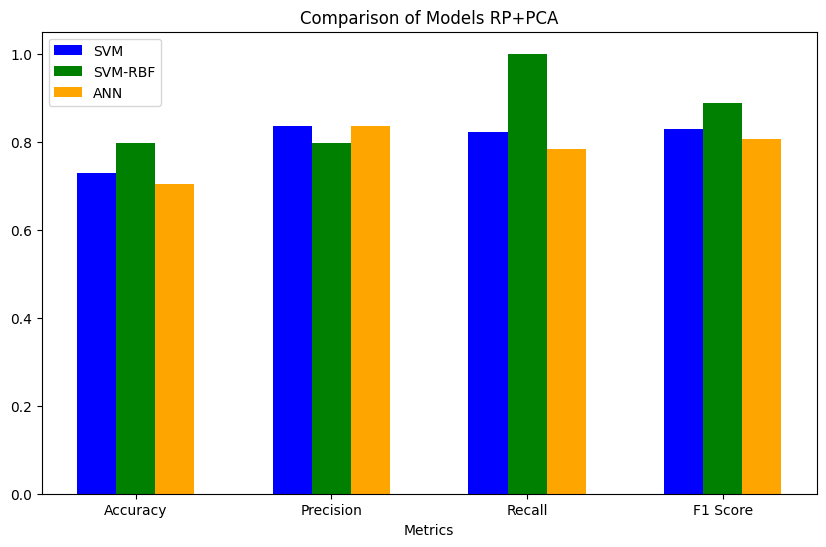

In [ ]:
labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
svm_scores = [avg_accuracy_svm, avg_precision_svm, avg_recall_svm, avg_f1_svm]
svm_rbf_scores = [avg_accuracy_svm_rbf, avg_precision_svm_rbf, avg_recall_svm_rbf, avg_f1_svm_rbf]
ann_scores = [avg_accuracy_ann, avg_precision_ann, avg_recall_ann, avg_f1_ann]

x = np.arange(len(labels))  # the label locations

width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width, svm_scores, width, label='SVM', color='blue')
rects2 = ax.bar(x, svm_rbf_scores, width, label='SVM-RBF', color='green')
rects3 = ax.bar(x + width, ann_scores, width, label='ANN', color='orange')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Metrics')
ax.set_title('Comparison of Models RP+PCA')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

# **SDAE**

In [ ]:
# Set parameters
dim = 500
n_splits = 5  # Number of folds for cross-validation

# Initialize lists to store metrics
avg_accuracies_svm = []
avg_precision_svm = []
avg_recall_svm = []
avg_f1_svm = []

avg_accuracies_svm_rbf = []
avg_precision_svm_rbf = []
avg_recall_svm_rbf = []
avg_f1_svm_rbf = []

avg_accuracies_ann = []
avg_precision_ann = []
avg_recall_ann = []
avg_f1_ann = []

# Define the feature set and labels for GSE25066
X = gse25066_normalized.iloc[:, 1:-1]  # Exclude the first column (Hybridization REF) and last (tumor label)
y = gse25066_normalized['tumor']

# Initialize StratifiedKFold
kf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Perform cross-validation
for train_index, test_index in kf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Apply SDAE with noise
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    sdae = Sequential()
    sdae.add(GaussianNoise(0.1, input_shape=(X_train_scaled.shape[1],)))  # Add Gaussian noise to input
    sdae.add(Dense(units=800, activation='relu'))
    sdae.add(GaussianNoise(0.1))
    sdae.add(Dense(units=400, activation='relu'))
    sdae.add(GaussianNoise(0.1))
    sdae.add(Dense(units=200, activation='relu'))
    sdae.add(GaussianNoise(0.1))
    sdae.add(Dense(units=100, activation='relu'))
    sdae.add(GaussianNoise(0.1))
    sdae.add(Dense(units=50, activation='relu'))
    sdae.add(GaussianNoise(0.1))
    sdae.add(Dense(units=25, activation='relu'))
    sdae.add(Dense(units=50, activation='relu'))
    sdae.add(Dense(units=100, activation='relu'))
    sdae.add(Dense(units=200, activation='relu'))
    sdae.add(Dense(units=400, activation='relu'))
    sdae.add(Dense(units=800, activation='relu'))
    sdae.add(Dense(units=X_train_scaled.shape[1], activation='linear'))

    sdae.compile(optimizer='adam', loss='mean_squared_error')

    sdae.fit(X_train_scaled, X_train_scaled, epochs=50, batch_size=32, shuffle=True, validation_data=(X_test_scaled, X_test_scaled), verbose=0)

    X_train_sdae = sdae.predict(X_train_scaled)
    X_test_sdae = sdae.predict(X_test_scaled)

    # Train and test SVM (linear kernel)
    svm = SVC(kernel='linear', C=1.0, gamma='auto')
    svm.fit(X_train_sdae, y_train)
    predictions_svm = svm.predict(X_test_sdae)
    accuracy_svm = accuracy_score(y_test, predictions_svm)
    precision_svm, recall_svm, f1_svm, _ = precision_recall_fscore_support(y_test, predictions_svm, average='binary', pos_label='yes')

    avg_accuracies_svm.append(accuracy_svm)
    avg_precision_svm.append(precision_svm)
    avg_recall_svm.append(recall_svm)
    avg_f1_svm.append(f1_svm)

    # Train and test SVM (RBF kernel)
    svm_rbf = SVC(kernel='rbf', C=1.0, gamma='auto')
    svm_rbf.fit(X_train_sdae, y_train)
    predictions_svm_rbf = svm_rbf.predict(X_test_sdae)
    accuracy_svm_rbf = accuracy_score(y_test, predictions_svm_rbf)
    precision_svm_rbf, recall_svm_rbf, f1_svm_rbf, _ = precision_recall_fscore_support(y_test, predictions_svm_rbf, average='binary', pos_label='yes')

    avg_accuracies_svm_rbf.append(accuracy_svm_rbf)
    avg_precision_svm_rbf.append(precision_svm_rbf)
    avg_recall_svm_rbf.append(recall_svm_rbf)
    avg_f1_svm_rbf.append(f1_svm_rbf)

    # Train and test ANN
    ann = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
    ann.fit(X_train_sdae, y_train)
    predictions_ann = ann.predict(X_test_sdae)
    accuracy_ann = accuracy_score(y_test, predictions_ann)
    precision_ann, recall_ann, f1_ann, _ = precision_recall_fscore_support(y_test, predictions_ann, average='binary', pos_label='yes')

    avg_accuracies_ann.append(accuracy_ann)
    avg_precision_ann.append(precision_ann)
    avg_recall_ann.append(recall_ann)
    avg_f1_ann.append(f1_ann)

# Calculate average scores
avg_accuracy_svm = np.mean(avg_accuracies_svm)
avg_precision_svm = np.mean(avg_precision_svm)
avg_recall_svm = np.mean(avg_recall_svm)
avg_f1_svm = np.mean(avg_f1_svm)

avg_accuracy_svm_rbf = np.mean(avg_accuracies_svm_rbf)
avg_precision_svm_rbf = np.mean(avg_precision_svm_rbf)
avg_recall_svm_rbf = np.mean(avg_recall_svm_rbf)
avg_f1_svm_rbf = np.mean(avg_f1_svm_rbf)

avg_accuracy_ann = np.mean(avg_accuracies_ann)
avg_precision_ann = np.mean(avg_precision_ann)
avg_recall_ann = np.mean(avg_recall_ann)
avg_f1_ann = np.mean(avg_f1_ann)

# Print results
print("SVM Results:")
print(f"Average Accuracy: {avg_accuracy_svm}")
print(f"Average Precision: {avg_precision_svm}")
print(f"Average Recall: {avg_recall_svm}")
print(f"Average F1 Score: {avg_f1_svm}")

print("\nSVM-RBF Results:")
print(f"Average Accuracy: {avg_accuracy_svm_rbf}")
print(f"Average Precision: {avg_precision_svm_rbf}")
print(f"Average Recall: {avg_recall_svm_rbf}")
print(f"Average F1 Score: {avg_f1_svm_rbf}")

print("\nANN Results:")
print(f"Average Accuracy: {avg_accuracy_ann}")
print(f"Average Precision: {avg_precision_ann}")
print(f"Average Recall: {avg_recall_ann}")
print(f"Average F1 Score: {avg_f1_ann}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/regularization/gaussian_noise.py:29: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/regularization/gaussian_noise.py:29: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/regularization/gaussian_noise.py:29: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/regularization/gaussian_noise.py:29: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/regularization/gaussian_noise.py:29: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
SVM Results:
Average Accuracy: 0.7013193156050299
Average Precision: 0.8233401117827939
Average Recall: 0.7960402466731581
Average F1 Score: 0.8091153200734145

SVM-RBF Results:
Average Accuracy: 0.7987631416202845
Average Precision: 0.7996044629973202
Average Recall: 0.9974358974358974
Average F1 Score: 0.8876161121322962

ANN Results:
Average Accuracy: 0.715563801278087
Average Precision: 0.8090878729114024
Average Recall: 0.8419019798766634
Average F1 Score: 0.8246537346892866


In [ ]:
sdae_svm = avg_accuracy_svm
sdae_svmrbf = avg_accuracy_svm_rbf
sdae_ann = avg_accuracy_ann

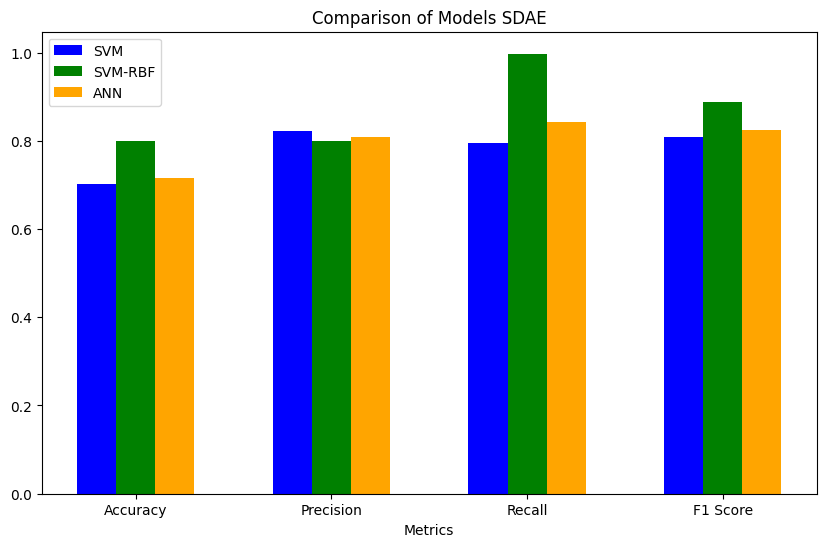

In [ ]:
labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
svm_scores = [avg_accuracy_svm, avg_precision_svm, avg_recall_svm, avg_f1_svm]
svm_rbf_scores = [avg_accuracy_svm_rbf, avg_precision_svm_rbf, avg_recall_svm_rbf, avg_f1_svm_rbf]
ann_scores = [avg_accuracy_ann, avg_precision_ann, avg_recall_ann, avg_f1_ann]

x = np.arange(len(labels))  # the label locations

width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width, svm_scores, width, label='SVM', color='blue')
rects2 = ax.bar(x, svm_rbf_scores, width, label='SVM-RBF', color='green')
rects3 = ax.bar(x + width, ann_scores, width, label='ANN', color='orange')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Metrics')
ax.set_title('Comparison of Models SDAE')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

# **RP+SDAE**

In [ ]:
# Define constants
dim = 500
iterations = 10

# Initialize dictionaries to store average metrics
avg_metrics = {
    'SVM': {'accuracy': [], 'precision': [], 'recall': [], 'f1': []},
    'SVM-RBF': {'accuracy': [], 'precision': [], 'recall': [], 'f1': []},
    'ANN': {'accuracy': [], 'precision': [], 'recall': [], 'f1': []}
}

def train_sdae(X_train_scaled, X_test_scaled):
    sdae = Sequential()
    sdae.add(GaussianNoise(0.1, input_shape=(X_train_scaled.shape[1],)))  # Add Gaussian noise
    # Define the SDAE architecture
    layers = [800, 400, 200, 100, 50, 25, 50, 100, 200, 400, 800]
    for units in layers:
        sdae.add(Dense(units=units, activation='relu'))
        sdae.add(GaussianNoise(0.1))
    sdae.add(Dense(units=X_train_scaled.shape[1], activation='linear'))

    sdae.compile(optimizer='adam', loss='mean_squared_error')
    sdae.fit(X_train_scaled, X_train_scaled, epochs=50, batch_size=32,
              shuffle=True, validation_data=(X_test_scaled, X_test_scaled), verbose=0)

    return sdae

def evaluate_model(model, X_train_sdae, y_train, X_test_sdae, y_test):
    model.fit(X_train_sdae, y_train)
    predictions = model.predict(X_test_sdae)
    accuracy = accuracy_score(y_test, predictions)
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, predictions, average='binary', pos_label='yes')
    return accuracy, precision, recall, f1

# Run the experiment for defined iterations
for iteration in range(iterations):
    sss = StratifiedShuffleSplit(n_splits=1, test_size=250, random_state=iteration)
    for train_index, test_index in sss.split(gse25066_normalized.iloc[:, 1:-1], gse25066_normalized['tumor']):
        X_train = gse25066_normalized.iloc[train_index]
        X_test = gse25066_normalized.iloc[test_index]

    # Apply Random Projection (RP)
    n_components_rp = min(dim, X_train.shape[0], X_train.shape[1])
    rp = SparseRandomProjection(n_components=n_components_rp, random_state=iteration)
    X_train_rp = rp.fit_transform(X_train.iloc[:, 1:-1])
    X_test_rp = rp.transform(X_test.iloc[:, 1:-1])

    # Apply Standard Scaler
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_rp)
    X_test_scaled = scaler.transform(X_test_rp)

    # Train SDAE
    sdae = train_sdae(X_train_scaled, X_test_scaled)
    X_train_sdae = sdae.predict(X_train_scaled)
    X_test_sdae = sdae.predict(X_test_scaled)

    # Train and evaluate SVM
    svm = SVC(kernel='linear', C=1.0, gamma='auto')
    metrics_svm = evaluate_model(svm, X_train_sdae, X_train['tumor'], X_test_sdae, X_test['tumor'])
    avg_metrics['SVM']['accuracy'].append(metrics_svm[0])
    avg_metrics['SVM']['precision'].append(metrics_svm[1])
    avg_metrics['SVM']['recall'].append(metrics_svm[2])
    avg_metrics['SVM']['f1'].append(metrics_svm[3])

    # Train and evaluate SVM-RBF
    svm_rbf = SVC(kernel='rbf', C=1.0, gamma='auto')
    metrics_svm_rbf = evaluate_model(svm_rbf, X_train_sdae, X_train['tumor'], X_test_sdae, X_test['tumor'])
    avg_metrics['SVM-RBF']['accuracy'].append(metrics_svm_rbf[0])
    avg_metrics['SVM-RBF']['precision'].append(metrics_svm_rbf[1])
    avg_metrics['SVM-RBF']['recall'].append(metrics_svm_rbf[2])
    avg_metrics['SVM-RBF']['f1'].append(metrics_svm_rbf[3])

    # Train and evaluate ANN
    ann = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=iteration)
    metrics_ann = evaluate_model(ann, X_train_sdae, X_train['tumor'], X_test_sdae, X_test['tumor'])
    avg_metrics['ANN']['accuracy'].append(metrics_ann[0])
    avg_metrics['ANN']['precision'].append(metrics_ann[1])
    avg_metrics['ANN']['recall'].append(metrics_ann[2])
    avg_metrics['ANN']['f1'].append(metrics_ann[3])

# Calculate and print average scores
for model in avg_metrics:
    print(f"\n{model} Results:")
    print(f"Average Accuracy: {np.mean(avg_metrics[model]['accuracy'])}")
    print(f"Average Precision: {np.mean(avg_metrics[model]['precision'])}")
    print(f"Average Recall: {np.mean(avg_metrics[model]['recall'])}")
    print(f"Average F1 Score: {np.mean(avg_metrics[model]['f1'])}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/regularization/gaussian_noise.py:29: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/regularization/gaussian_noise.py:29: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/regularization/gaussian_noise.py:29: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/regularization/gaussian_noise.py:29: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/regularization/gaussian_noise.py:29: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/regularization/gaussian_noise.py:29: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/regularization/gaussian_noise.py:29: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/regularization/gaussian_noise.py:29: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/regularization/gaussian_noise.py:29: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/regularization/gaussian_noise.py:29: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 

SVM Results:
Average Accuracy: 0.7507999999999999
Average Precision: 0.816199320262802
Average Recall: 0.8864321608040202
Average F1 Score: 0.8495676054960548

SVM-RBF Results:
Average Accuracy: 0.7972
Average Precision: 0.798887538573627
Average Recall: 0.9959798994974876
Average F1 Score: 0.886605024539084

ANN Results:
Average Accuracy: 0.7444
Average Precision: 0.8211095563821308
Average Recall: 0.8678391959798996
Average F1 Score: 0.84365201331306


In [ ]:
rpsdae_svm = avg_accuracy_svm
rpsdae_svmrbf = avg_accuracy_svm_rbf
rpsdae_ann = avg_accuracy_ann

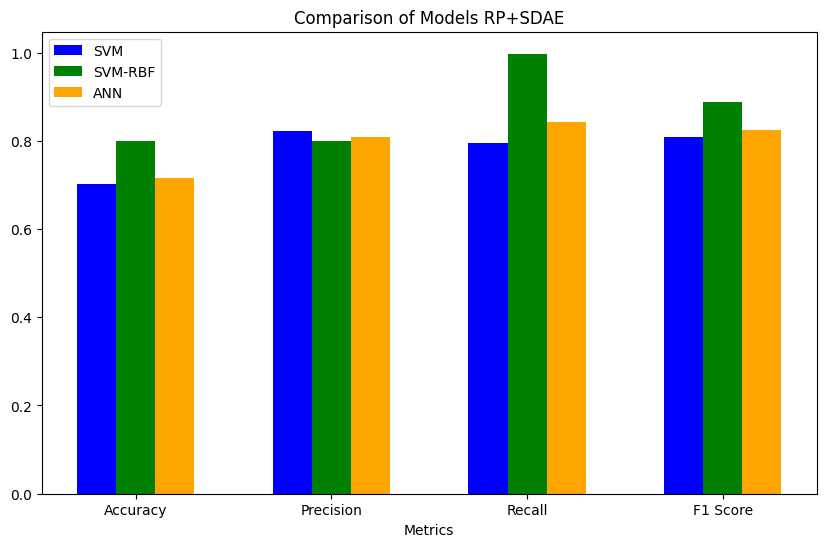

In [ ]:
labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
svm_scores = [avg_accuracy_svm, avg_precision_svm, avg_recall_svm, avg_f1_svm]
svm_rbf_scores = [avg_accuracy_svm_rbf, avg_precision_svm_rbf, avg_recall_svm_rbf, avg_f1_svm_rbf]
ann_scores = [avg_accuracy_ann, avg_precision_ann, avg_recall_ann, avg_f1_ann]

x = np.arange(len(labels))  # the label locations

width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width, svm_scores, width, label='SVM', color='blue')
rects2 = ax.bar(x, svm_rbf_scores, width, label='SVM-RBF', color='green')
rects3 = ax.bar(x + width, ann_scores, width, label='ANN', color='orange')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Metrics')
ax.set_title('Comparison of Models RP+SDAE')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

# **FS+SDAE**

In [ ]:
dim = 1000

# Initialize metrics
avg_accuracies_svm = []
avg_precision_svm = []
avg_recall_svm = []
avg_f1_svm = []

avg_accuracies_svm_rbf = []
avg_precision_svm_rbf = []
avg_recall_svm_rbf = []
avg_f1_svm_rbf = []

avg_accuracies_ann = []
avg_precision_ann = []
avg_recall_ann = []
avg_f1_ann = []

# Stratified K-Folds cross-validator
skf = StratifiedKFold(n_splits=10)

# Prepare the input data from GSE25066 dataset
X = gse25066.iloc[:, 1:-1]  # Features
y = gse25066['tumor']       # Labels

# Min-Max Scaling and Feature Selection
scaler = MinMaxScaler()
feature_selector = SelectKBest(chi2, k=dim)

# Cross-validation for each model
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Scaling the data
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Feature Selection
    X_train_fs = feature_selector.fit_transform(X_train_scaled, y_train)
    X_test_fs = feature_selector.transform(X_test_scaled)

    # Train SDAE
    sdae = Sequential()
    sdae.add(GaussianNoise(0.1, input_shape=(X_train_fs.shape[1],)))  # Add Gaussian noise to input
    sdae.add(Dense(units=800, activation='relu'))
    sdae.add(GaussianNoise(0.1))
    sdae.add(Dense(units=400, activation='relu'))
    sdae.add(GaussianNoise(0.1))
    sdae.add(Dense(units=200, activation='relu'))
    sdae.add(GaussianNoise(0.1))
    sdae.add(Dense(units=100, activation='relu'))
    sdae.add(GaussianNoise(0.1))
    sdae.add(Dense(units=50, activation='relu'))
    sdae.add(GaussianNoise(0.1))
    sdae.add(Dense(units=25, activation='relu'))
    sdae.add(Dense(units=50, activation='relu'))
    sdae.add(Dense(units=100, activation='relu'))
    sdae.add(Dense(units=200, activation='relu'))
    sdae.add(Dense(units=400, activation='relu'))
    sdae.add(Dense(units=800, activation='relu'))
    sdae.add(Dense(units=X_train_fs.shape[1], activation='linear'))

    sdae.compile(optimizer='adam', loss='mean_squared_error')
    sdae.fit(X_train_fs, X_train_fs, epochs=50, batch_size=32, shuffle=True, verbose=0)

    # Get encoded data
    X_train_sdae = sdae.predict(X_train_fs)
    X_test_sdae = sdae.predict(X_test_fs)

    # Train and test SVM
    svm = SVC(kernel='linear', C=1.0, gamma='auto')
    predictions_svm = svm.fit(X_train_sdae, y_train).predict(X_test_sdae)
    accuracy_svm = accuracy_score(y_test, predictions_svm)
    precision_svm, recall_svm, f1_svm, _ = precision_recall_fscore_support(y_test, predictions_svm, average='binary', pos_label='yes')

    avg_accuracies_svm.append(accuracy_svm)
    avg_precision_svm.append(precision_svm)
    avg_recall_svm.append(recall_svm)
    avg_f1_svm.append(f1_svm)

    # Train and test SVM-RBF
    svm_rbf = SVC(kernel='rbf', C=1.0, gamma='auto')
    predictions_svm_rbf = svm_rbf.fit(X_train_sdae, y_train).predict(X_test_sdae)
    accuracy_svm_rbf = accuracy_score(y_test, predictions_svm_rbf)
    precision_svm_rbf, recall_svm_rbf, f1_svm_rbf, _ = precision_recall_fscore_support(y_test, predictions_svm_rbf, average='binary', pos_label='yes')

    avg_accuracies_svm_rbf.append(accuracy_svm_rbf)
    avg_precision_svm_rbf.append(precision_svm_rbf)
    avg_recall_svm_rbf.append(recall_svm_rbf)
    avg_f1_svm_rbf.append(f1_svm_rbf)

    # Train and test ANN
    ann = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000)
    predictions_ann = ann.fit(X_train_sdae, y_train).predict(X_test_sdae)
    accuracy_ann = accuracy_score(y_test, predictions_ann)
    precision_ann, recall_ann, f1_ann, _ = precision_recall_fscore_support(y_test, predictions_ann, average='binary', pos_label='yes')

    avg_accuracies_ann.append(accuracy_ann)
    avg_precision_ann.append(precision_ann)
    avg_recall_ann.append(recall_ann)
    avg_f1_ann.append(f1_ann)

# Calculate average scores
avg_accuracy_svm = np.mean(avg_accuracies_svm)
avg_precision_svm = np.mean(avg_precision_svm)
avg_recall_svm = np.mean(avg_recall_svm)
avg_f1_svm = np.mean(avg_f1_svm)

avg_accuracy_svm_rbf = np.mean(avg_accuracies_svm_rbf)
avg_precision_svm_rbf = np.mean(avg_precision_svm_rbf)
avg_recall_svm_rbf = np.mean(avg_recall_svm_rbf)
avg_f1_svm_rbf = np.mean(avg_f1_svm_rbf)

avg_accuracy_ann = np.mean(avg_accuracies_ann)
avg_precision_ann = np.mean(avg_precision_ann)
avg_recall_ann = np.mean(avg_recall_ann)
avg_f1_ann = np.mean(avg_f1_ann)

# Print results
print("SVM Results:")
print(f"Average Accuracy: {avg_accuracy_svm}")
print(f"Average Precision: {avg_precision_svm}")
print(f"Average Recall: {avg_recall_svm}")
print(f"Average F1 Score: {avg_f1_svm}")

print("\nSVM-RBF Results:")
print(f"Average Accuracy: {avg_accuracy_svm_rbf}")
print(f"Average Precision: {avg_precision_svm_rbf}")
print(f"Average Recall: {avg_recall_svm_rbf}")
print(f"Average F1 Score: {avg_f1_svm_rbf}")

print("\nANN Results:")
print(f"Average Accuracy: {avg_accuracy_ann}")
print(f"Average Precision: {avg_precision_ann}")
print(f"Average Recall: {avg_recall_ann}")
print(f"Average F1 Score: {avg_f1_ann}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/regularization/gaussian_noise.py:29: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/regularization/gaussian_noise.py:29: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/regularization/gaussian_noise.py:29: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/regularization/gaussian_noise.py:29: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/regularization/gaussian_noise.py:29: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/regularization/gaussian_noise.py:29: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/regularization/gaussian_noise.py:29: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/regularization/gaussian_noise.py:29: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/regularization/gaussian_noise.py:29: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/regularization/gaussian_noise.py:29: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
SVM Results:
Average Accuracy: 0.7988163265306123
Average Precision: 0.8141652079371859
Average Recall: 0.9692948717948718
Average F1 Score: 0.8846706996516962

SVM-RBF Results:
Average Accuracy: 0.796734693877551
Average Precision: 0.796734693877551
Average Recall: 1.0
Average F1 Score: 0.8868686868686868

ANN Results:
Average Accuracy: 0.7988163265306123
Average Precision: 0.8245345427835881
Average Recall: 0.9513461538461538
Average F1 Score: 0.8823904299894453


In [ ]:
fssdae_svm = avg_accuracy_svm
fssdae_svmrbf = avg_accuracy_svm_rbf
fssdae_ann = avg_accuracy_ann

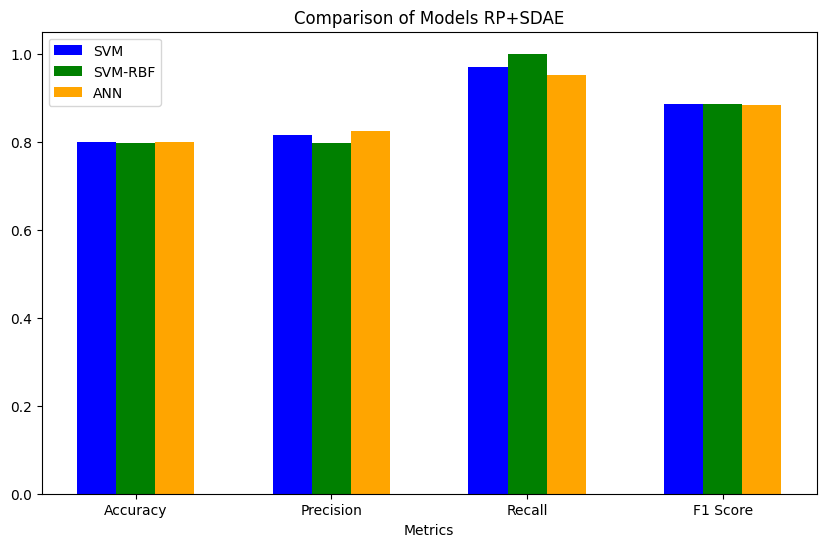

In [ ]:
labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
svm_scores = [avg_accuracy_svm, avg_precision_svm, avg_recall_svm, avg_f1_svm]
svm_rbf_scores = [avg_accuracy_svm_rbf, avg_precision_svm_rbf, avg_recall_svm_rbf, avg_f1_svm_rbf]
ann_scores = [avg_accuracy_ann, avg_precision_ann, avg_recall_ann, avg_f1_ann]

x = np.arange(len(labels))  # the label locations

width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width, svm_scores, width, label='SVM', color='blue')
rects2 = ax.bar(x, svm_rbf_scores, width, label='SVM-RBF', color='green')
rects3 = ax.bar(x + width, ann_scores, width, label='ANN', color='orange')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Metrics')
ax.set_title('Comparison of Models RP+SDAE')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

In [ ]:
from tabulate import tabulate

# Convert accuracies to percentage
def format_percentage(accuracy):
    return f'{accuracy * 100:.2f}%'

# Define the accuracies and models
data = [
    ['PCA', format_percentage(pca_svm), format_percentage(pca_svmrbf), format_percentage(pca_ann)],
    ['KPCA', format_percentage(kpca_svm), format_percentage(kpca_svmrbf), format_percentage(kpca_ann)],
    ['RP+PCA', format_percentage(rppca_svm), format_percentage(rppca_svmrbf), format_percentage(rppca_ann)],
    ['SDAE', format_percentage(sdae_svm), format_percentage(sdae_svmrbf), format_percentage(sdae_ann)],
    ['RP+SDAE', format_percentage(rpsdae_svm), format_percentage(rpsdae_svmrbf), format_percentage(rpsdae_ann)],
    ['FS+SDAE', format_percentage(fssdae_svm), format_percentage(fssdae_svmrbf), format_percentage(fssdae_ann)]
]

headers = ['Model', 'SVM', 'SVM-RBF', 'ANN']

# Print the table
print(tabulate(data, headers=headers, tablefmt='grid'))


+---------+--------+-----------+--------+
| Model   | SVM    | SVM-RBF   | ANN    |
+=========+========+===========+========+
| PCA     | 81.50% | 79.47%    | 77.23% |
+---------+--------+-----------+--------+
| KPCA    | 79.47% | 79.67%    | 80.69% |
+---------+--------+-----------+--------+
| RP+PCA  | 72.97% | 79.67%    | 70.34% |
+---------+--------+-----------+--------+
| SDAE    | 70.13% | 79.88%    | 71.56% |
+---------+--------+-----------+--------+
| RP+SDAE | 70.13% | 79.88%    | 71.56% |
+---------+--------+-----------+--------+
| FS+SDAE | 79.88% | 79.67%    | 79.88% |
+---------+--------+-----------+--------+


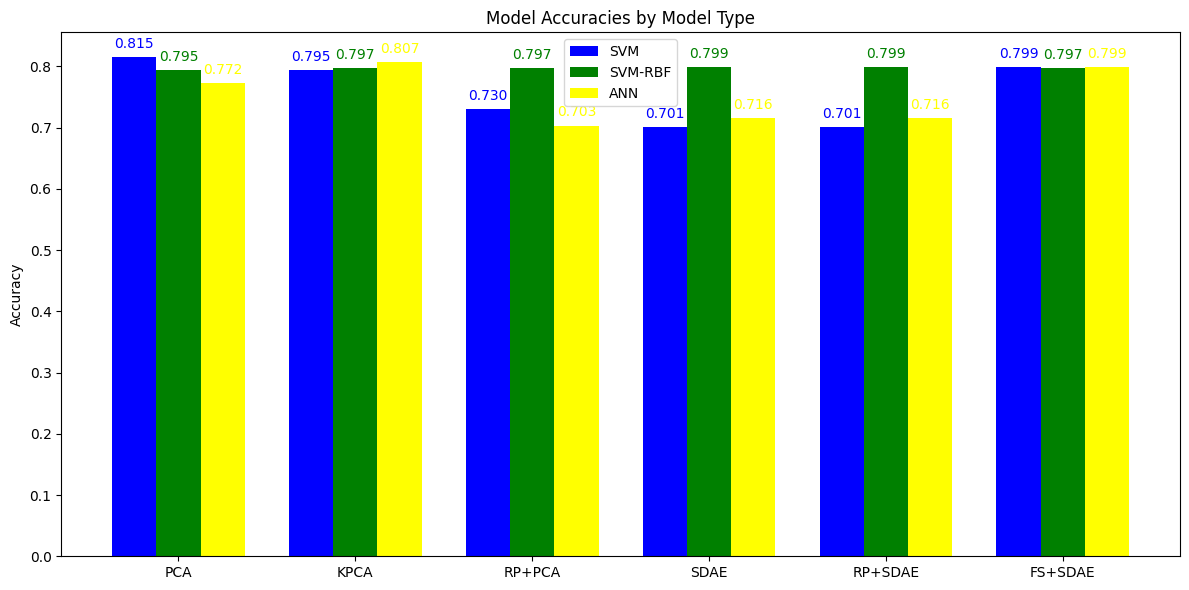

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the variables with accuracies
accuracies_svm = [pca_svm, kpca_svm, rppca_svm, sdae_svm, rpsdae_svm, fssdae_svm]
accuracies_svm_rbf = [pca_svmrbf, kpca_svmrbf, rppca_svmrbf, sdae_svmrbf, rpsdae_svmrbf, fssdae_svmrbf]
accuracies_ann = [pca_ann, kpca_ann, rppca_ann, sdae_ann, rpsdae_ann, fssdae_ann]

# Define the corresponding model names
models = ['PCA', 'KPCA', 'RP+PCA', 'SDAE', 'RP+SDAE', 'FS+SDAE']

# Create a bar plot with different colors for SVM, SVM-RBF, and ANN
bar_width = 0.25
index = np.arange(len(models))

plt.figure(figsize=(12, 6))

plt.bar(index - bar_width, accuracies_svm, bar_width, label='SVM', color='blue')
plt.bar(index, accuracies_svm_rbf, bar_width, label='SVM-RBF', color='green')
plt.bar(index + bar_width, accuracies_ann, bar_width, label='ANN', color='yellow')

plt.xticks(index, models)
plt.ylabel('Accuracy')
plt.title('Model Accuracies by Model Type')

# Add accuracy values on top of the bars
for i, value in enumerate(accuracies_svm):
    plt.text(i - bar_width, value + 0.01, f'{value:.3f}', ha='center', va='bottom', color='blue')

for i, value in enumerate(accuracies_svm_rbf):
    plt.text(i, value + 0.01, f'{value:.3f}', ha='center', va='bottom', color='green')

for i, value in enumerate(accuracies_ann):
    plt.text(i + bar_width, value + 0.01, f'{value:.3f}', ha='center', va='bottom', color='yellow')

plt.legend()
plt.tight_layout()

# Show the plot
plt.show()
